# Customer Retention Project

#### Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store.The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively .
The objective is to perform extensive data analysis on a given dataset and produce valuable insights that will help in customer retention.


In [49]:
#loading the libraries

import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#importing warnings
import warnings
warnings.filterwarnings("ignore")

#### Loading the dataset

In [50]:
df=pd.read_excel('customer_retention_dataset.xlsx')
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [51]:
#checking shape of dataset
print('The dataset contains',df.shape[0],'rows &',df.shape[1],'columns')

The dataset contains 269 rows & 71 columns


In [52]:
#checking column names
df.columns


Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [53]:
#extracting the general information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [54]:
#checking datatype of each feature
df.columns.groupby(df.dtypes)

{int64: ['4 What is the Pin Code of where you shop online from?'], object: ['1Gender of respondent', '2 How old are you? ', '3 Which city do you shop online from?', '5 Since How Long You are Shopping Online ?', '6 How many times you have made an online purchase in the past 1 year?', '7 How do you access the internet while shopping on-line?', '8 Which device do you use to access the online shopping?', '9 What is the screen size of your mobile device?						                                        ', '10 What is the operating system (OS) of your device?				                                          ', '11 What browser do you run on your device to access the website?			                                                          ', '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ', '13 After first visit, how do you reach the online retail store?				                                     

In [55]:
#checking for null values
df.isnull().values.any()

False

It means no null values are present in our dataset

We can also see it via visualization with the help of heatmap

<AxesSubplot:>

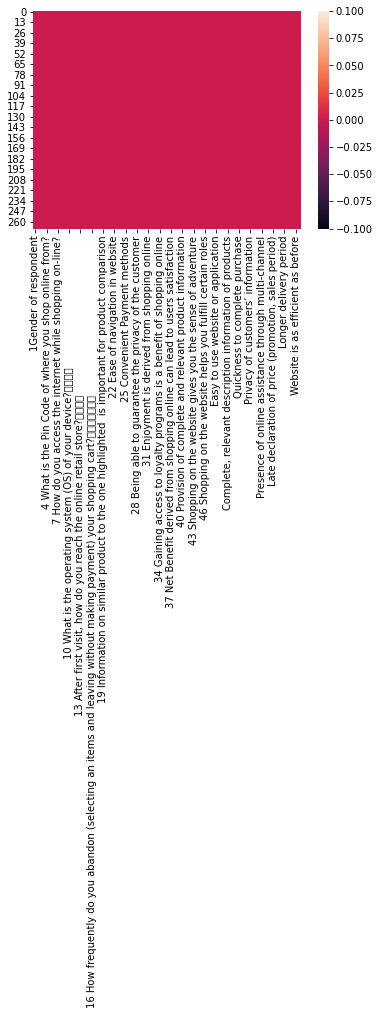

In [56]:
#visualisation
sns.heatmap(df.isnull())


In [57]:
#making seperate lists of categorical and continuos varioables
categorical=[x for x in df.columns if df[x].dtype==object]
cont=[x for x in df.columns if x not in categorical]

In [58]:
print(len(categorical))
print(len(cont))

70
1


we see that only one feature is of numeric datatype,rest all are categorical.

### Statistical Summary

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
4 What is the Pin Code of where you shop online from?,269.0,220465.747212,140524.341051,110008.0,122018.0,201303.0,201310.0,560037.0


In [60]:
# Describing object types
df.describe(include='object').T


,count,unique,top,freq
1Gender of respondent,269,2,Female,181
2 How old are you?,269,5,31-40 years,81
3 Which city do you shop online from?,269,11,Delhi,58
5 Since How Long You are Shopping Online ?,269,5,Above 4 years,98
6 How many times you have made an online purchase in the past 1 year?,269,6,Less than 10 times,114
...,...,...,...,...
Longer delivery period,269,6,Paytm.com,72
Change in website/Application design,269,7,Amazon.in,96
Frequent disruption when moving from one page to another,269,8,Amazon.in,53
Website is as efficient as before,269,8,Amazon.in,94


In [61]:
df['4 What is the Pin Code of where you shop online from?'].nunique()

39

In [62]:
df.groupby('3 Which city do you shop online from?')['4 What is the Pin Code of where you shop online from?'].value_counts()

3 Which city do you shop online from?  4 What is the Pin Code of where you shop online from?
Bangalore                              560010                                                    8
                                       560037                                                    8
                                       530068                                                    5
                                       560002                                                    4
                                       560003                                                    4
                                       560018                                                    4
                                       560013                                                    3
                                       560001                                                    1
Bulandshahr                            203001                                                    2
Delhi           

## Data Visualization

Female    67.0
Male      33.0
Name: 1Gender of respondent, dtype: float64 2


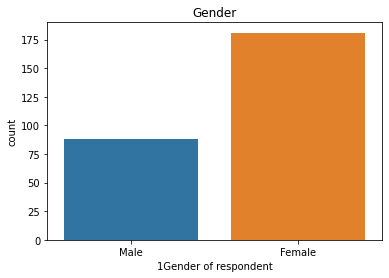

In [63]:
sns.countplot(df['1Gender of respondent'])
plt.title('Gender')
print(round(df['1Gender of respondent'].value_counts()/269*100),2)

Out of the total ,67% customer is female

#### visualizing each categorical column wrt count of each value

In [64]:
def value_count(column):
    diff_count=len(df[column].value_counts())
    if diff_count<5:
        plt.figure(figsize=(10,5))
    elif diff_count<10:
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
    elif diff_count<20:
        plt.figure(figsize=(25,6))
        plt.xticks(rotation=90)
    else:
        plt.figure(figsize=(20,6))
        plt.xticks(rotation=90)
    sns.countplot(x=column,data=df,orient='v')
    plt.show()
    #checking percentage of data classification in each string attribute
    print(round(df[i].value_counts()/269*100),2)
    

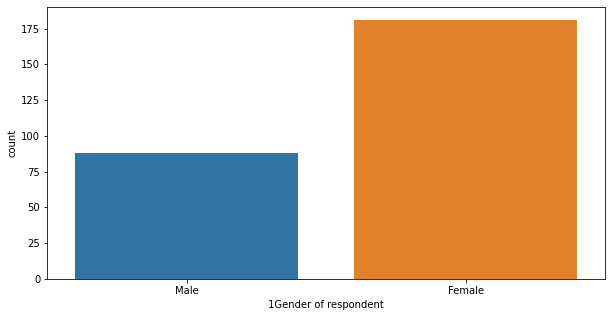

Female    67.0
Male      33.0
Name: 1Gender of respondent, dtype: float64 2


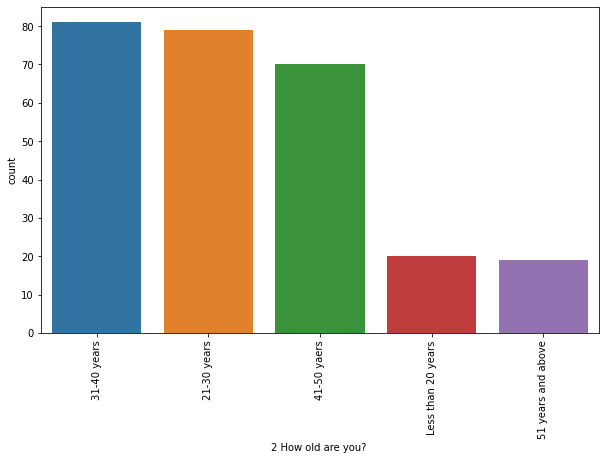

31-40 years           30.0
21-30 years           29.0
41-50 yaers           26.0
Less than 20 years     7.0
51 years and above     7.0
Name: 2 How old are you? , dtype: float64 2


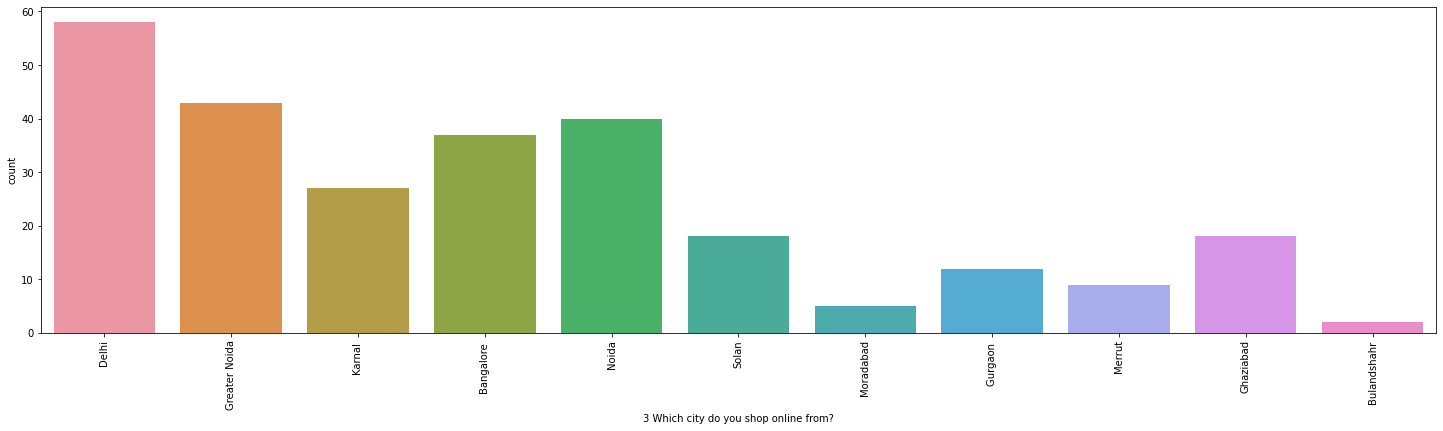

Delhi            22.0
Greater Noida    16.0
Noida            15.0
Bangalore        14.0
Karnal           10.0
Ghaziabad         7.0
Solan             7.0
Gurgaon           4.0
Merrut            3.0
Moradabad         2.0
Bulandshahr       1.0
Name: 3 Which city do you shop online from?, dtype: float64 2


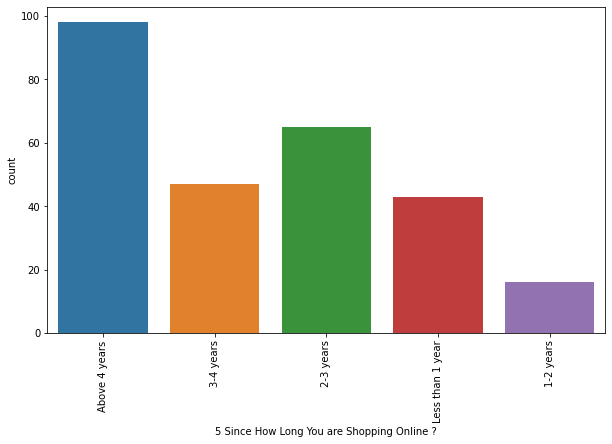

Above 4 years       36.0
2-3 years           24.0
3-4 years           17.0
Less than 1 year    16.0
1-2 years            6.0
Name: 5 Since How Long You are Shopping Online ?, dtype: float64 2


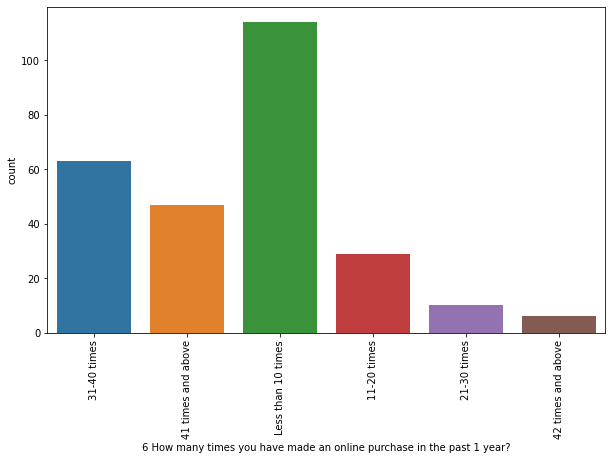

Less than 10 times    42.0
31-40 times           23.0
41 times and above    17.0
11-20 times           11.0
21-30 times            4.0
42 times and above     2.0
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: float64 2


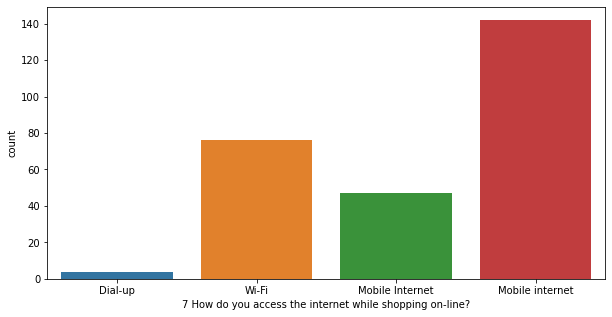

Mobile internet    53.0
Wi-Fi              28.0
Mobile Internet    17.0
Dial-up             1.0
Name: 7 How do you access the internet while shopping on-line?, dtype: float64 2


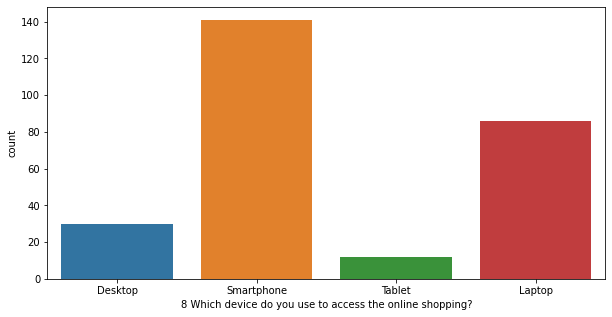

Smartphone    52.0
Laptop        32.0
Desktop       11.0
Tablet         4.0
Name: 8 Which device do you use to access the online shopping?, dtype: float64 2


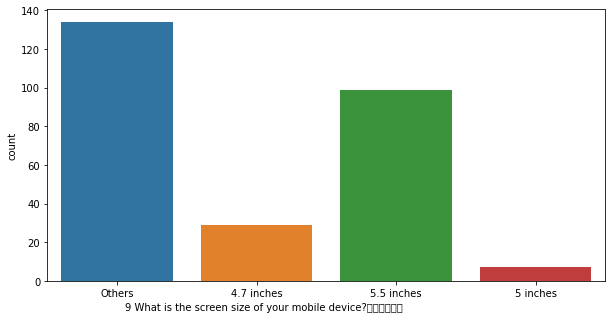

Others        50.0
5.5 inches    37.0
4.7 inches    11.0
5 inches       3.0
Name: 9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        , dtype: float64 2


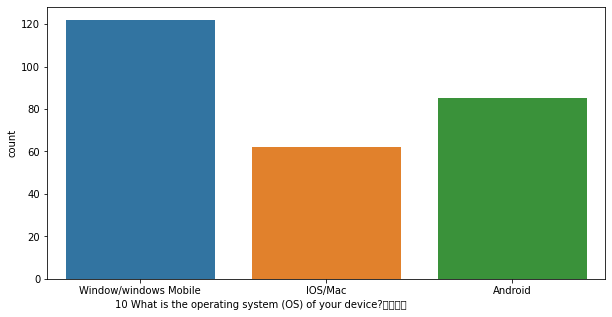

Window/windows Mobile    45.0
Android                  32.0
IOS/Mac                  23.0
Name: 10 What is the operating system (OS) of your device?\t\t\t\t                                          , dtype: float64 2


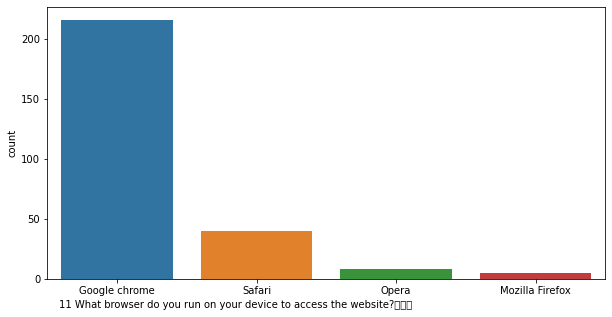

Google chrome      80.0
Safari             15.0
Opera               3.0
Mozilla Firefox     2.0
Name: 11 What browser do you run on your device to access the website?\t\t\t                                                          , dtype: float64 2


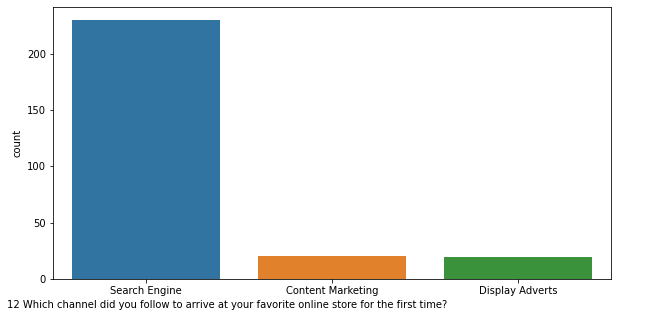

Search Engine        86.0
Content Marketing     7.0
Display Adverts       7.0
Name: 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   , dtype: float64 2


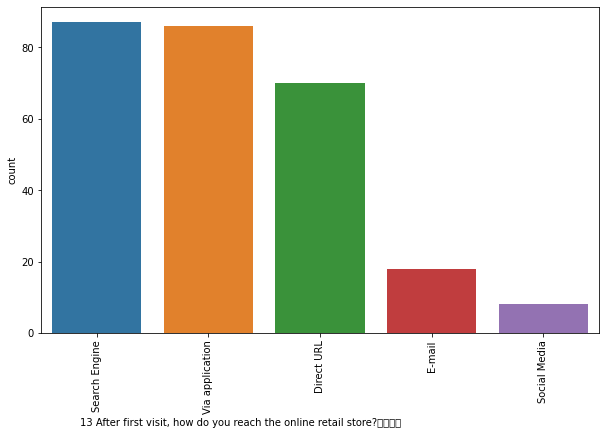

Search Engine      32.0
Via application    32.0
Direct URL         26.0
E-mail              7.0
Social Media        3.0
Name: 13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   , dtype: float64 2


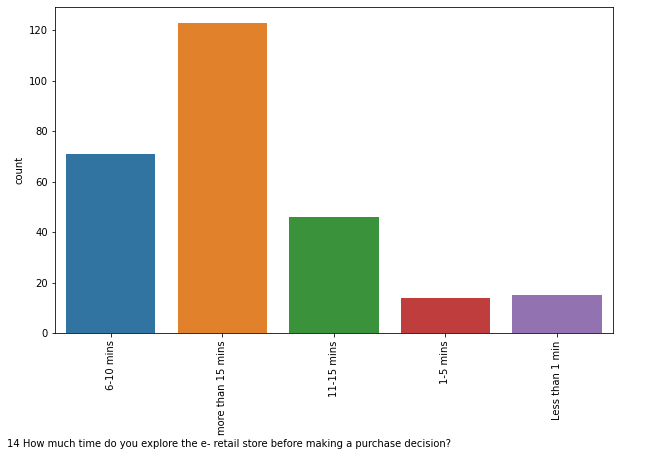

more than 15 mins    46.0
6-10 mins            26.0
11-15 mins           17.0
Less than 1 min       6.0
1-5 mins              5.0
Name: 14 How much time do you explore the e- retail store before making a purchase decision?                                                                   , dtype: float64 2


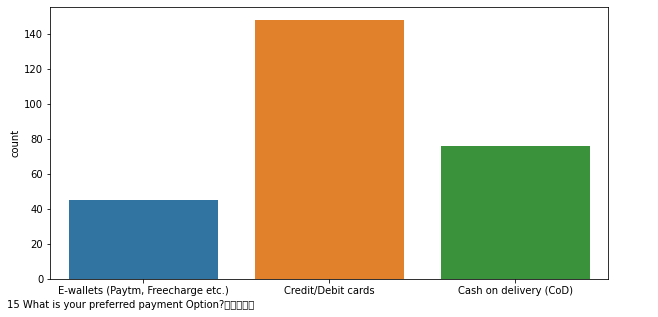

Credit/Debit cards                    55.0
Cash on delivery (CoD)                28.0
E-wallets (Paytm, Freecharge etc.)    17.0
Name: 15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               , dtype: float64 2


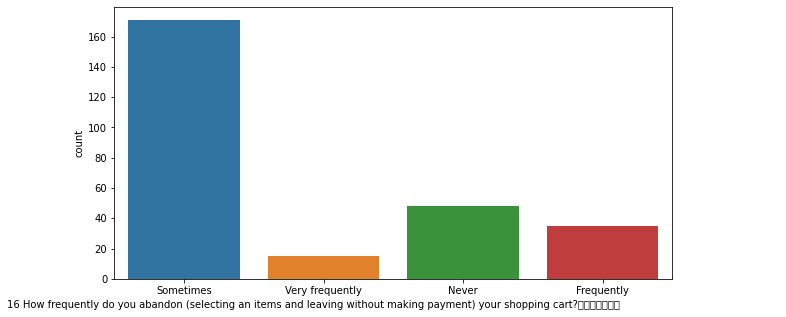

Sometimes          64.0
Never              18.0
Frequently         13.0
Very frequently     6.0
Name: 16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   , dtype: float64 2


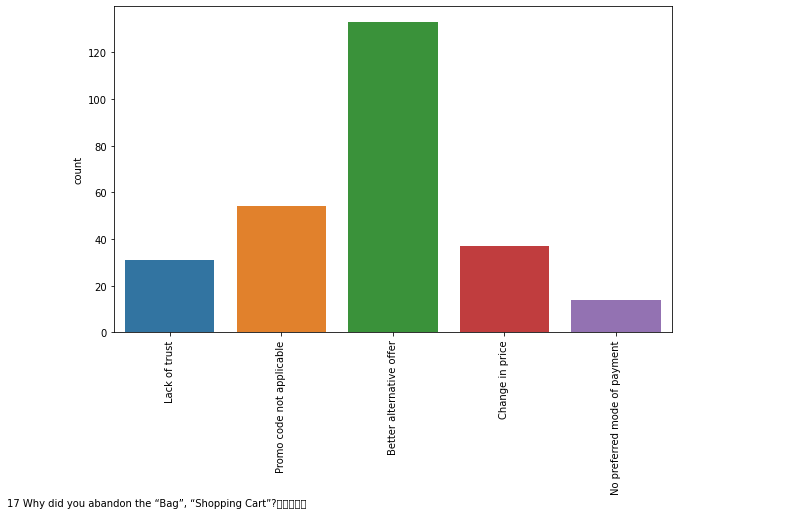

Better alternative offer        49.0
Promo code not applicable       20.0
Change in price                 14.0
Lack of trust                   12.0
No preferred mode of payment     5.0
Name: 17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       , dtype: float64 2


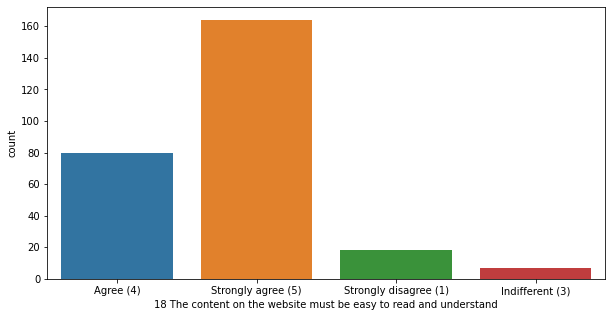

Strongly agree (5)       61.0
Agree (4)                30.0
Strongly disagree (1)     7.0
Indifferent (3)           3.0
Name: 18 The content on the website must be easy to read and understand, dtype: float64 2


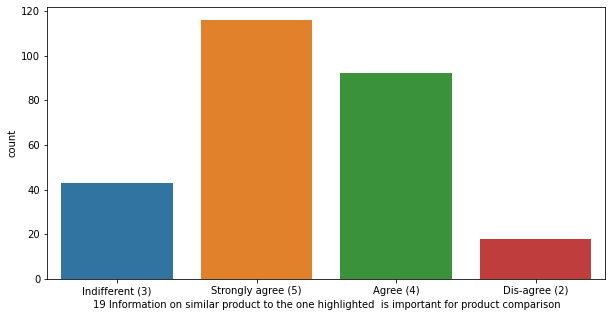

Strongly agree (5)    43.0
Agree (4)             34.0
Indifferent (3)       16.0
Dis-agree (2)          7.0
Name: 19 Information on similar product to the one highlighted  is important for product comparison, dtype: float64 2


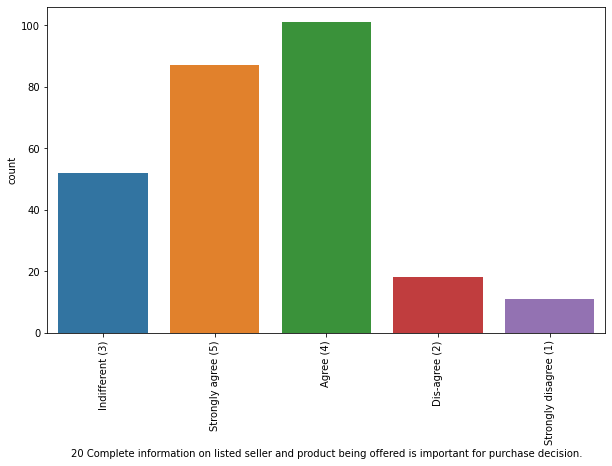

Agree (4)                38.0
Strongly agree (5)       32.0
Indifferent (3)          19.0
Dis-agree (2)             7.0
Strongly disagree (1)     4.0
Name: 20 Complete information on listed seller and product being offered is important for purchase decision., dtype: float64 2


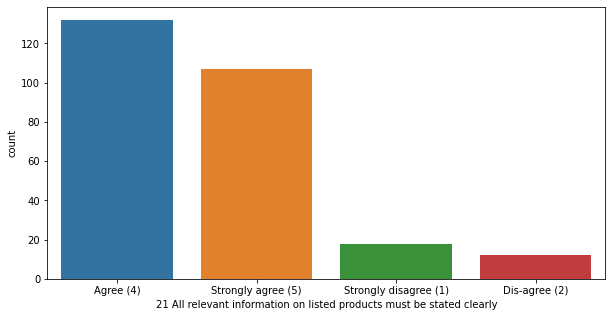

Agree (4)                49.0
Strongly agree (5)       40.0
Strongly disagree (1)     7.0
Dis-agree (2)             4.0
Name: 21 All relevant information on listed products must be stated clearly, dtype: float64 2


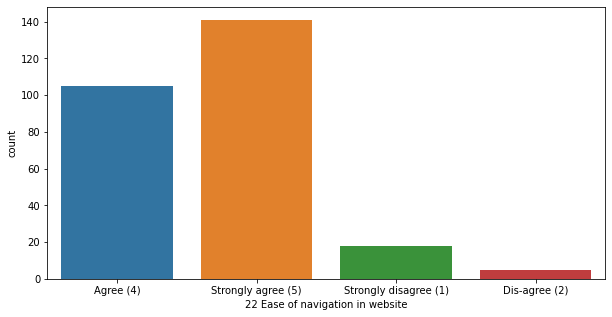

Strongly agree (5)       52.0
Agree (4)                39.0
Strongly disagree (1)     7.0
Dis-agree (2)             2.0
Name: 22 Ease of navigation in website, dtype: float64 2


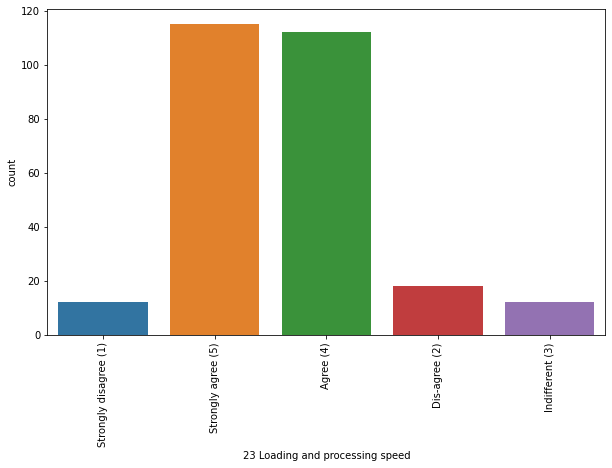

Strongly agree (5)       43.0
Agree (4)                42.0
Dis-agree (2)             7.0
Indifferent (3)           4.0
Strongly disagree (1)     4.0
Name: 23 Loading and processing speed, dtype: float64 2


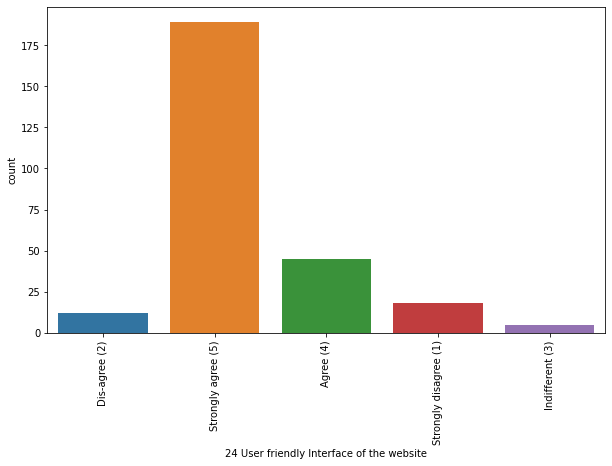

Strongly agree (5)       70.0
Agree (4)                17.0
Strongly disagree (1)     7.0
Dis-agree (2)             4.0
Indifferent (3)           2.0
Name: 24 User friendly Interface of the website, dtype: float64 2


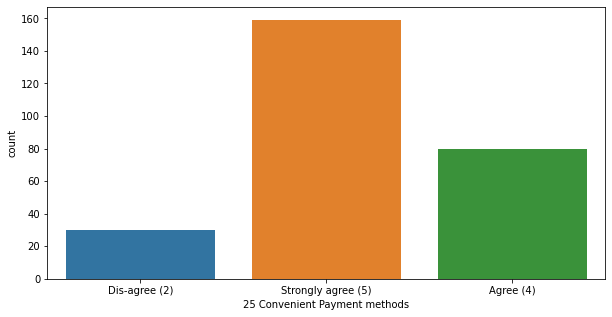

Strongly agree (5)    59.0
Agree (4)             30.0
Dis-agree (2)         11.0
Name: 25 Convenient Payment methods, dtype: float64 2


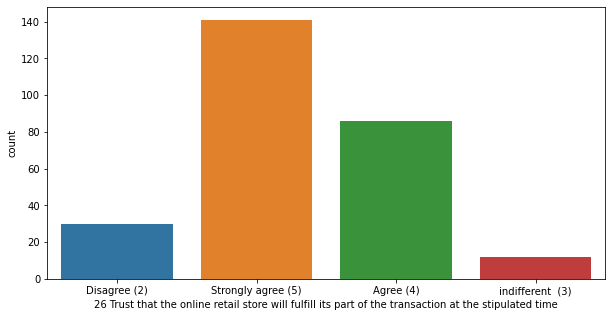

Strongly agree (5)    52.0
Agree (4)             32.0
Disagree (2)          11.0
indifferent  (3)       4.0
Name: 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time, dtype: float64 2


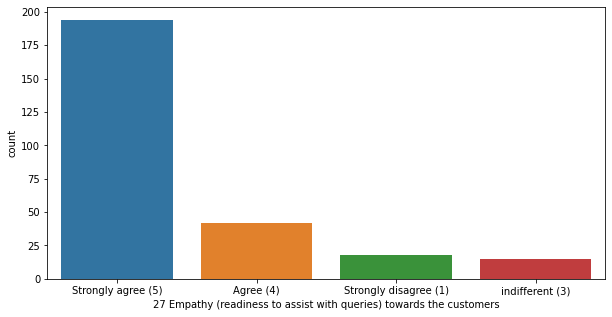

Strongly agree (5)       72.0
Agree (4)                16.0
Strongly disagree (1)     7.0
indifferent (3)           6.0
Name: 27 Empathy (readiness to assist with queries) towards the customers, dtype: float64 2


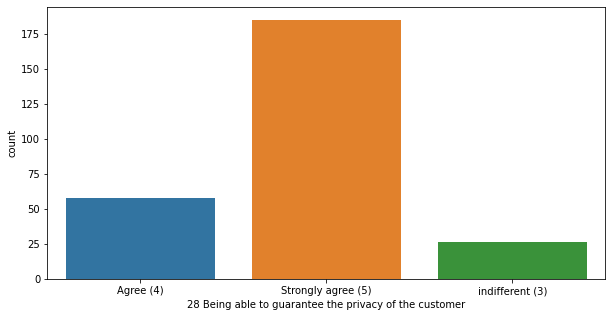

Strongly agree (5)    69.0
Agree (4)             22.0
indifferent (3)       10.0
Name: 28 Being able to guarantee the privacy of the customer, dtype: float64 2


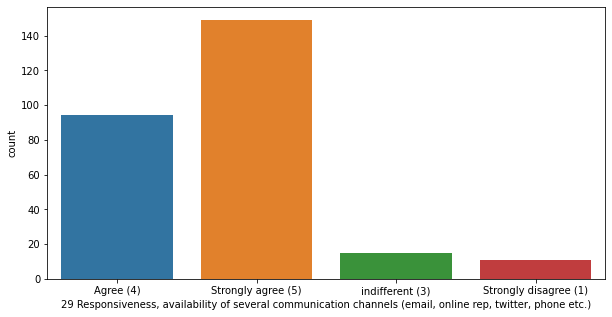

Strongly agree (5)       55.0
Agree (4)                35.0
indifferent (3)           6.0
Strongly disagree (1)     4.0
Name: 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), dtype: float64 2


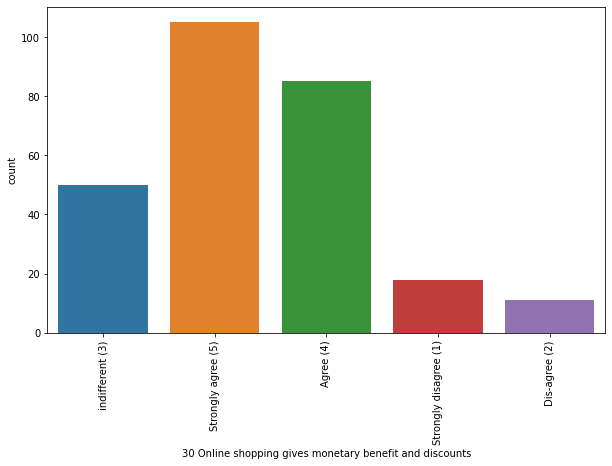

Strongly agree (5)       39.0
Agree (4)                32.0
indifferent (3)          19.0
Strongly disagree (1)     7.0
Dis-agree (2)             4.0
Name: 30 Online shopping gives monetary benefit and discounts, dtype: float64 2


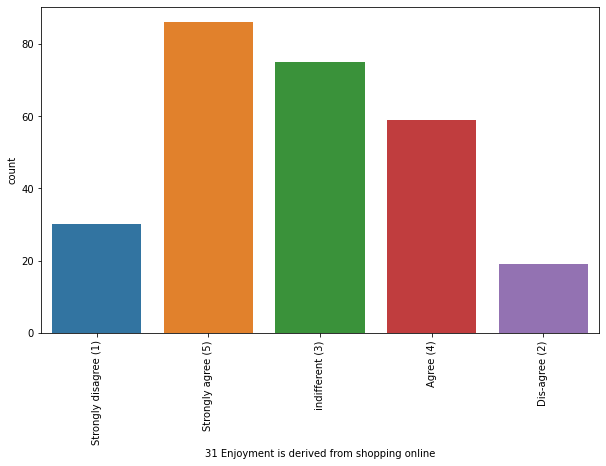

Strongly agree (5)       32.0
indifferent (3)          28.0
Agree (4)                22.0
Strongly disagree (1)    11.0
Dis-agree (2)             7.0
Name: 31 Enjoyment is derived from shopping online, dtype: float64 2


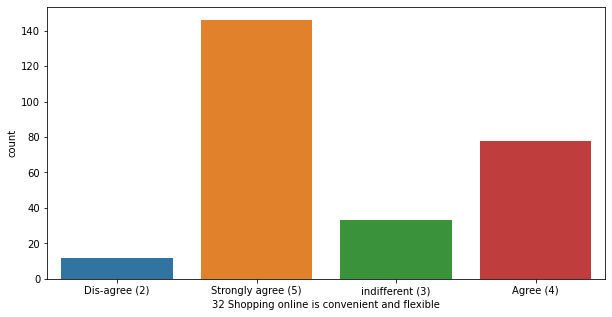

Strongly agree (5)    54.0
Agree (4)             29.0
indifferent (3)       12.0
Dis-agree (2)          4.0
Name: 32 Shopping online is convenient and flexible, dtype: float64 2


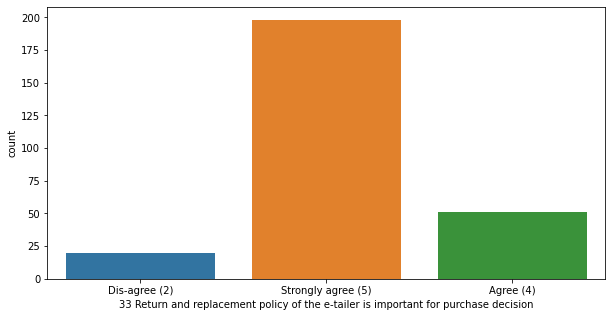

Strongly agree (5)    74.0
Agree (4)             19.0
Dis-agree (2)          7.0
Name: 33 Return and replacement policy of the e-tailer is important for purchase decision, dtype: float64 2


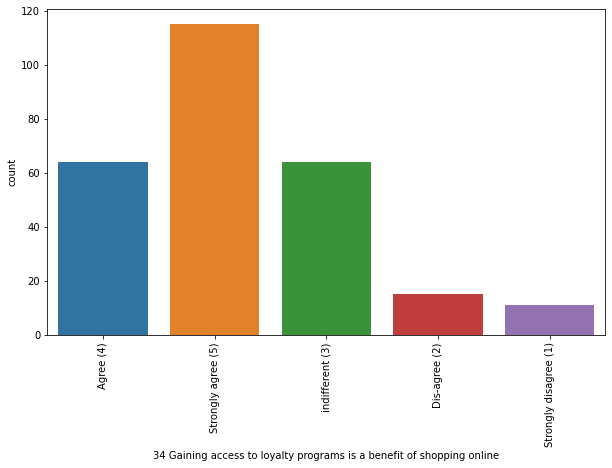

Strongly agree (5)       43.0
Agree (4)                24.0
indifferent (3)          24.0
Dis-agree (2)             6.0
Strongly disagree (1)     4.0
Name: 34 Gaining access to loyalty programs is a benefit of shopping online, dtype: float64 2


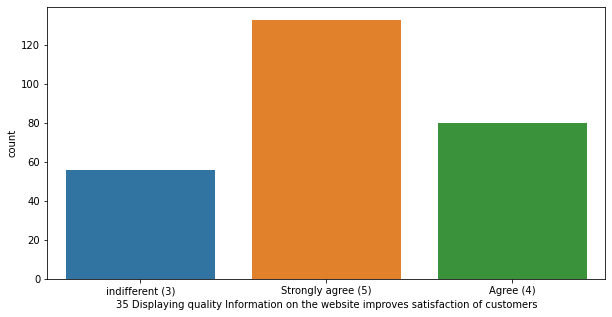

Strongly agree (5)    49.0
Agree (4)             30.0
indifferent (3)       21.0
Name: 35 Displaying quality Information on the website improves satisfaction of customers, dtype: float64 2


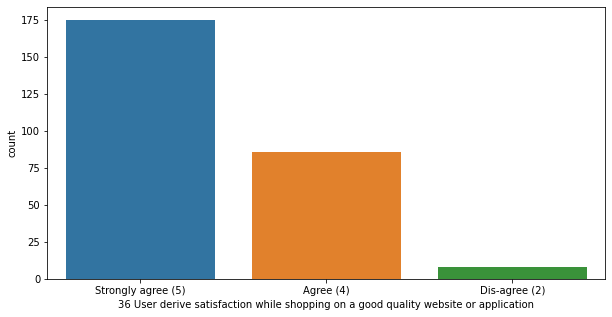

Strongly agree (5)    65.0
Agree (4)             32.0
Dis-agree (2)          3.0
Name: 36 User derive satisfaction while shopping on a good quality website or application, dtype: float64 2


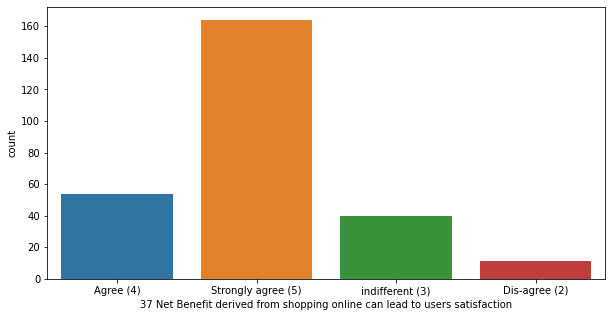

Strongly agree (5)    61.0
Agree (4)             20.0
indifferent (3)       15.0
Dis-agree (2)          4.0
Name: 37 Net Benefit derived from shopping online can lead to users satisfaction, dtype: float64 2


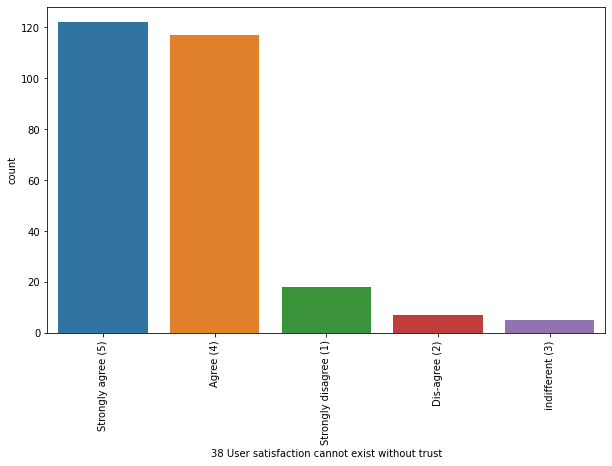

Strongly agree (5)       45.0
Agree (4)                43.0
Strongly disagree (1)     7.0
Dis-agree (2)             3.0
indifferent (3)           2.0
Name: 38 User satisfaction cannot exist without trust, dtype: float64 2


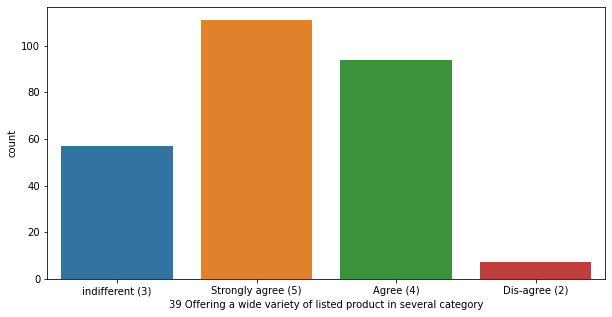

Strongly agree (5)    41.0
Agree (4)             35.0
indifferent (3)       21.0
Dis-agree (2)          3.0
Name: 39 Offering a wide variety of listed product in several category, dtype: float64 2


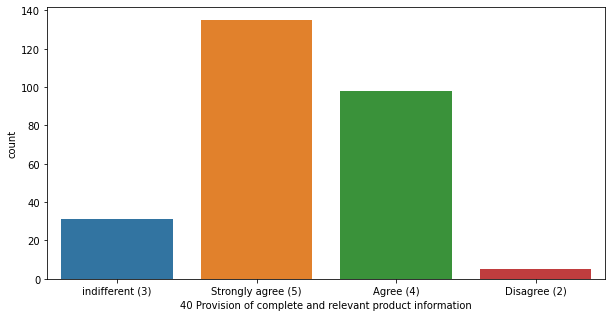

Strongly agree (5)    50.0
Agree (4)             36.0
indifferent (3)       12.0
Disagree (2)           2.0
Name: 40 Provision of complete and relevant product information, dtype: float64 2


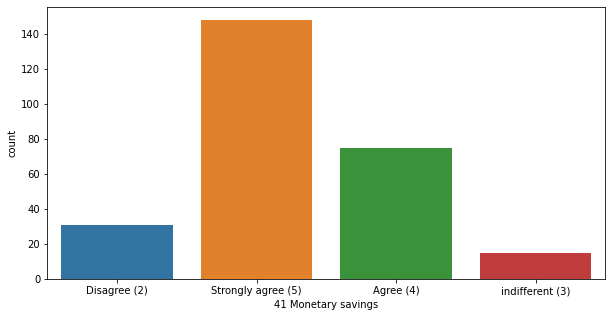

Strongly agree (5)    55.0
Agree (4)             28.0
Disagree (2)          12.0
indifferent (3)        6.0
Name: 41 Monetary savings, dtype: float64 2


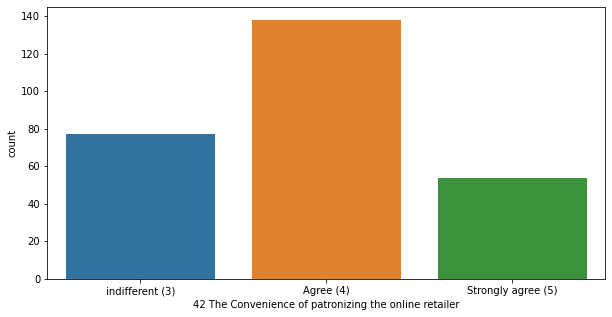

Agree (4)             51.0
indifferent (3)       29.0
Strongly agree (5)    20.0
Name: 42 The Convenience of patronizing the online retailer, dtype: float64 2


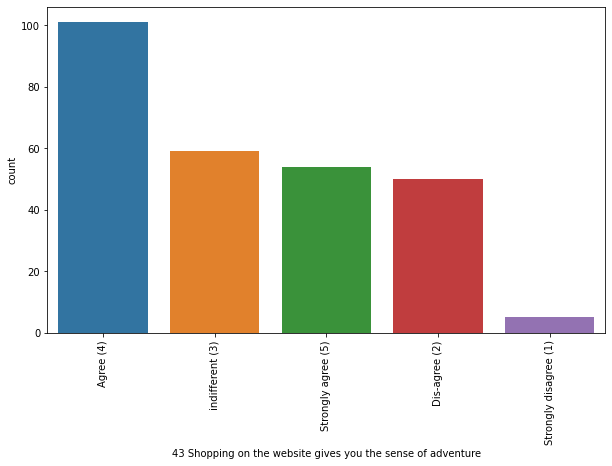

Agree (4)                38.0
indifferent (3)          22.0
Strongly agree (5)       20.0
Dis-agree (2)            19.0
Strongly disagree (1)     2.0
Name: 43 Shopping on the website gives you the sense of adventure, dtype: float64 2


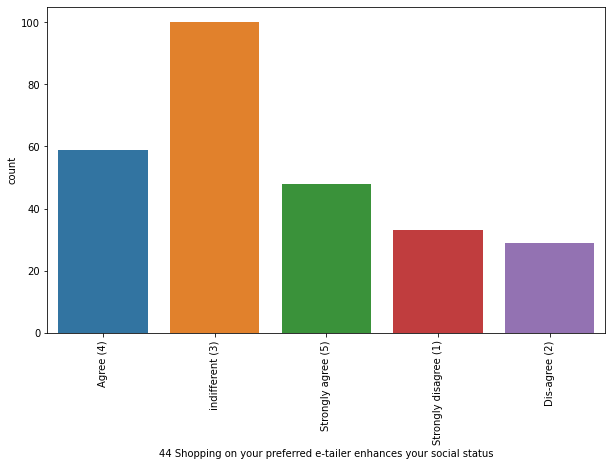

indifferent (3)          37.0
Agree (4)                22.0
Strongly agree (5)       18.0
Strongly disagree (1)    12.0
Dis-agree (2)            11.0
Name: 44 Shopping on your preferred e-tailer enhances your social status, dtype: float64 2


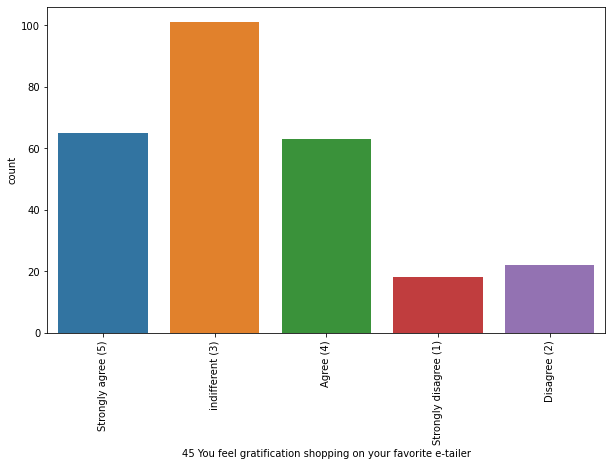

indifferent (3)          38.0
Strongly agree (5)       24.0
Agree (4)                23.0
Disagree (2)              8.0
Strongly disagree (1)     7.0
Name: 45 You feel gratification shopping on your favorite e-tailer, dtype: float64 2


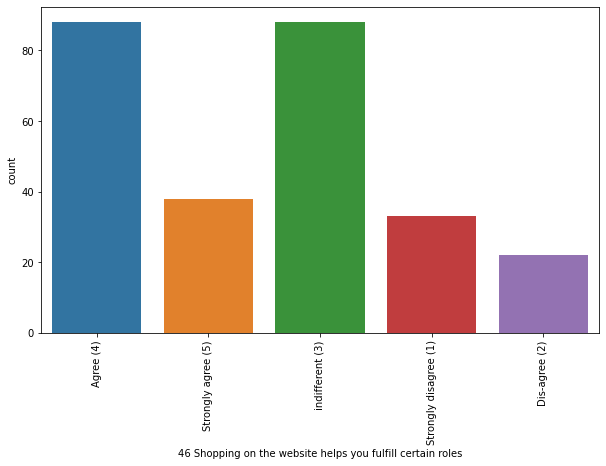

Agree (4)                33.0
indifferent (3)          33.0
Strongly agree (5)       14.0
Strongly disagree (1)    12.0
Dis-agree (2)             8.0
Name: 46 Shopping on the website helps you fulfill certain roles, dtype: float64 2


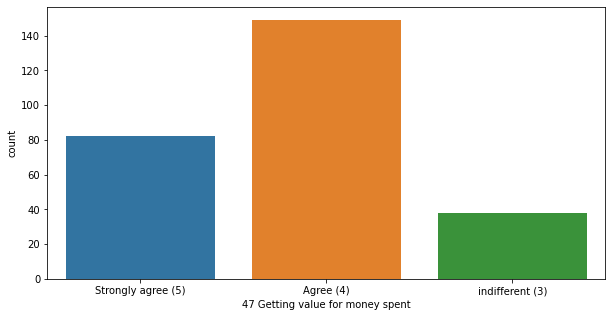

Agree (4)             55.0
Strongly agree (5)    30.0
indifferent (3)       14.0
Name: 47 Getting value for money spent, dtype: float64 2


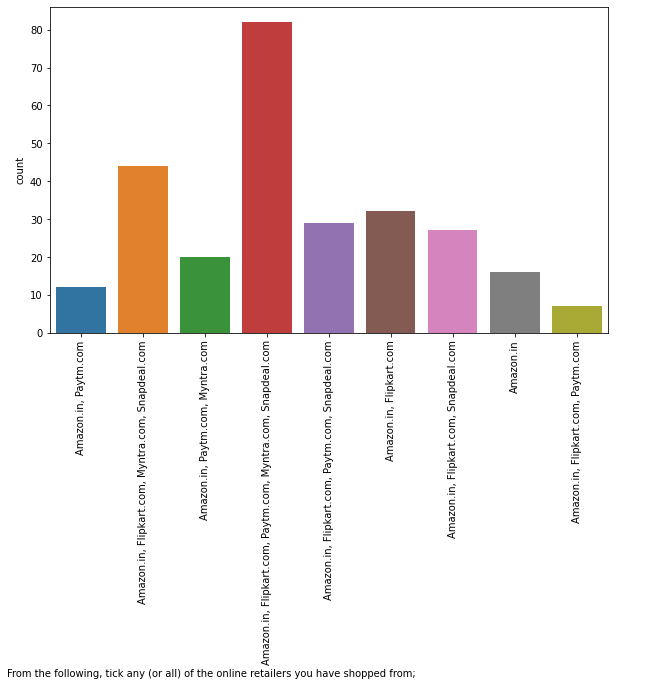

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               16.0
Amazon.in, Flipkart.com                                         12.0
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11.0
Amazon.in, Flipkart.com, Snapdeal.com                           10.0
Amazon.in, Paytm.com, Myntra.com                                 7.0
Amazon.in                                                        6.0
Amazon.in, Paytm.com                                             4.0
Amazon.in, Flipkart.com, Paytm.com                               3.0
Name: From the following, tick any (or all) of the online retailers you have shopped from;                                                                           , dtype: float64 2


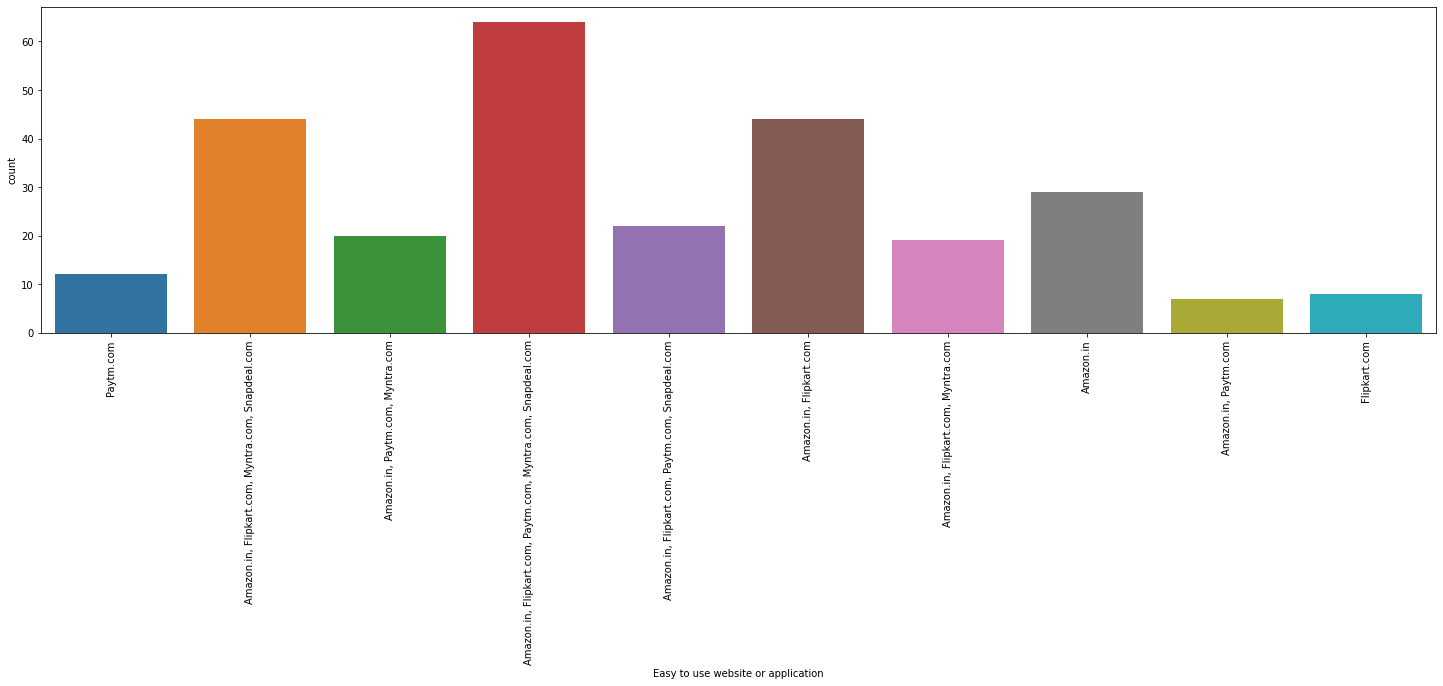

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               16.0
Amazon.in, Flipkart.com                                         16.0
Amazon.in                                                       11.0
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                 8.0
Amazon.in, Paytm.com, Myntra.com                                 7.0
Amazon.in, Flipkart.com, Myntra.com                              7.0
Paytm.com                                                        4.0
Flipkart.com                                                     3.0
Amazon.in, Paytm.com                                             3.0
Name: Easy to use website or application, dtype: float64 2


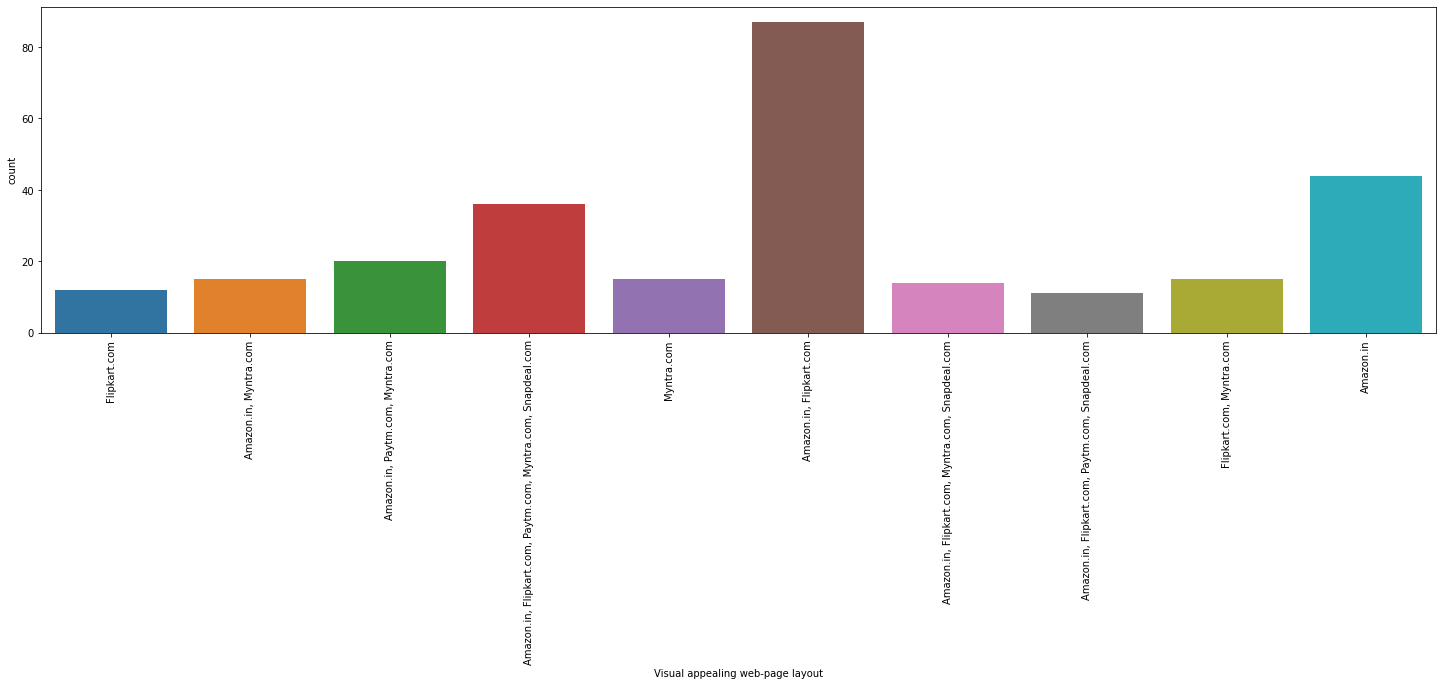

Amazon.in, Flipkart.com                                         32.0
Amazon.in                                                       16.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13.0
Amazon.in, Paytm.com, Myntra.com                                 7.0
Myntra.com                                                       6.0
Amazon.in, Myntra.com                                            6.0
Flipkart.com, Myntra.com                                         6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5.0
Flipkart.com                                                     4.0
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                 4.0
Name: Visual appealing web-page layout, dtype: float64 2


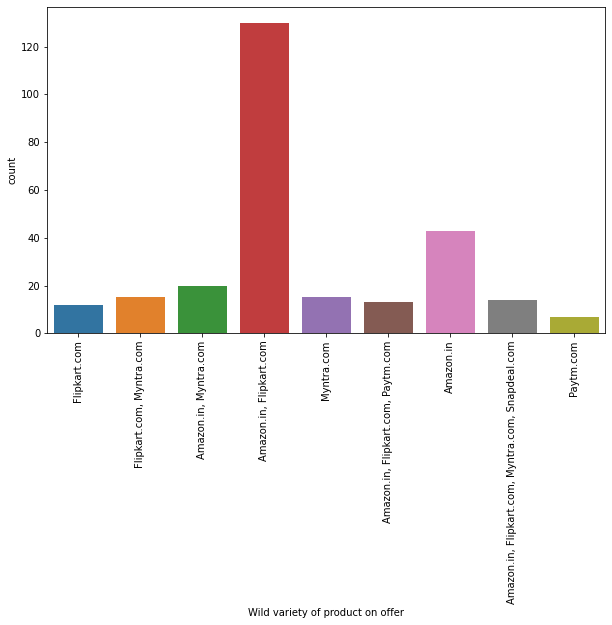

Amazon.in, Flipkart.com                              48.0
Amazon.in                                            16.0
Amazon.in, Myntra.com                                 7.0
Myntra.com                                            6.0
Flipkart.com, Myntra.com                              6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     5.0
Amazon.in, Flipkart.com, Paytm.com                    5.0
Flipkart.com                                          4.0
Paytm.com                                             3.0
Name: Wild variety of product on offer, dtype: float64 2


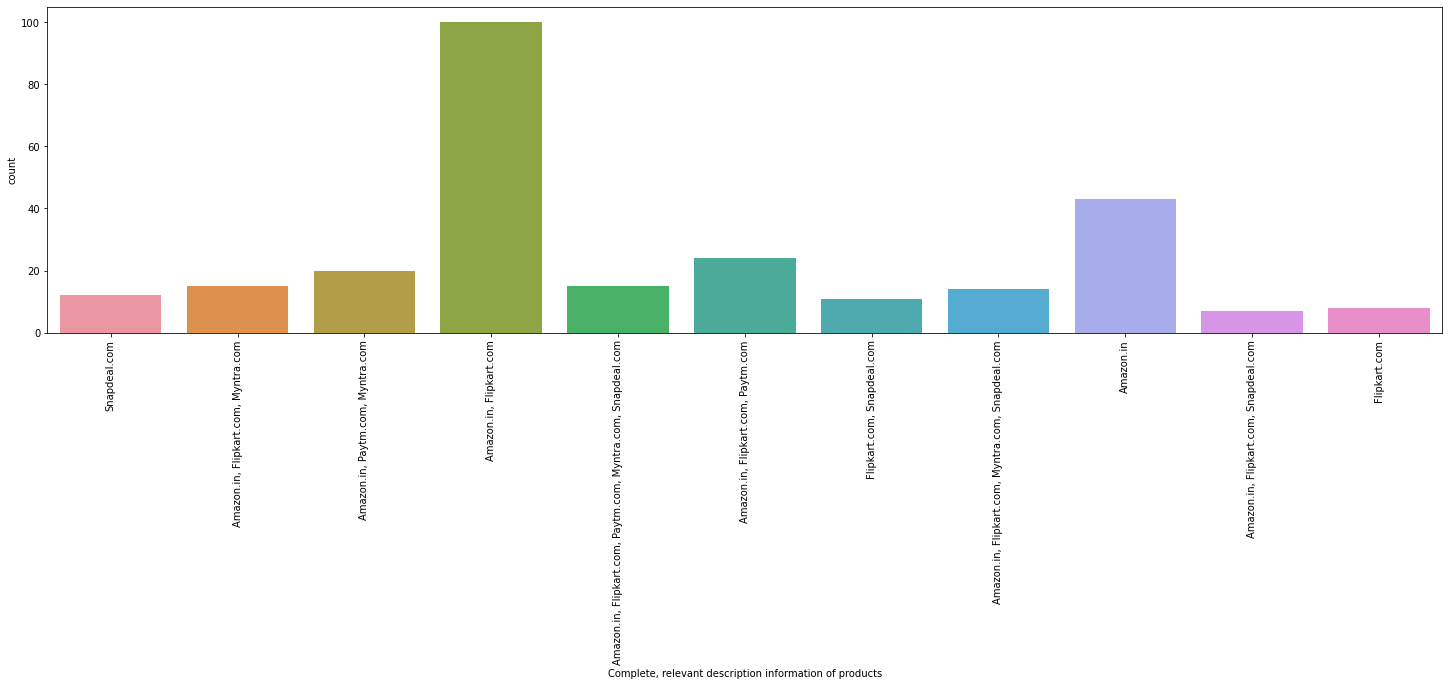

Amazon.in, Flipkart.com                                         37.0
Amazon.in                                                       16.0
Amazon.in, Flipkart.com, Paytm.com                               9.0
Amazon.in, Paytm.com, Myntra.com                                 7.0
Amazon.in, Flipkart.com, Myntra.com                              6.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5.0
Snapdeal.com                                                     4.0
Flipkart.com, Snapdeal.com                                       4.0
Flipkart.com                                                     3.0
Amazon.in, Flipkart.com, Snapdeal.com                            3.0
Name: Complete, relevant description information of products, dtype: float64 2


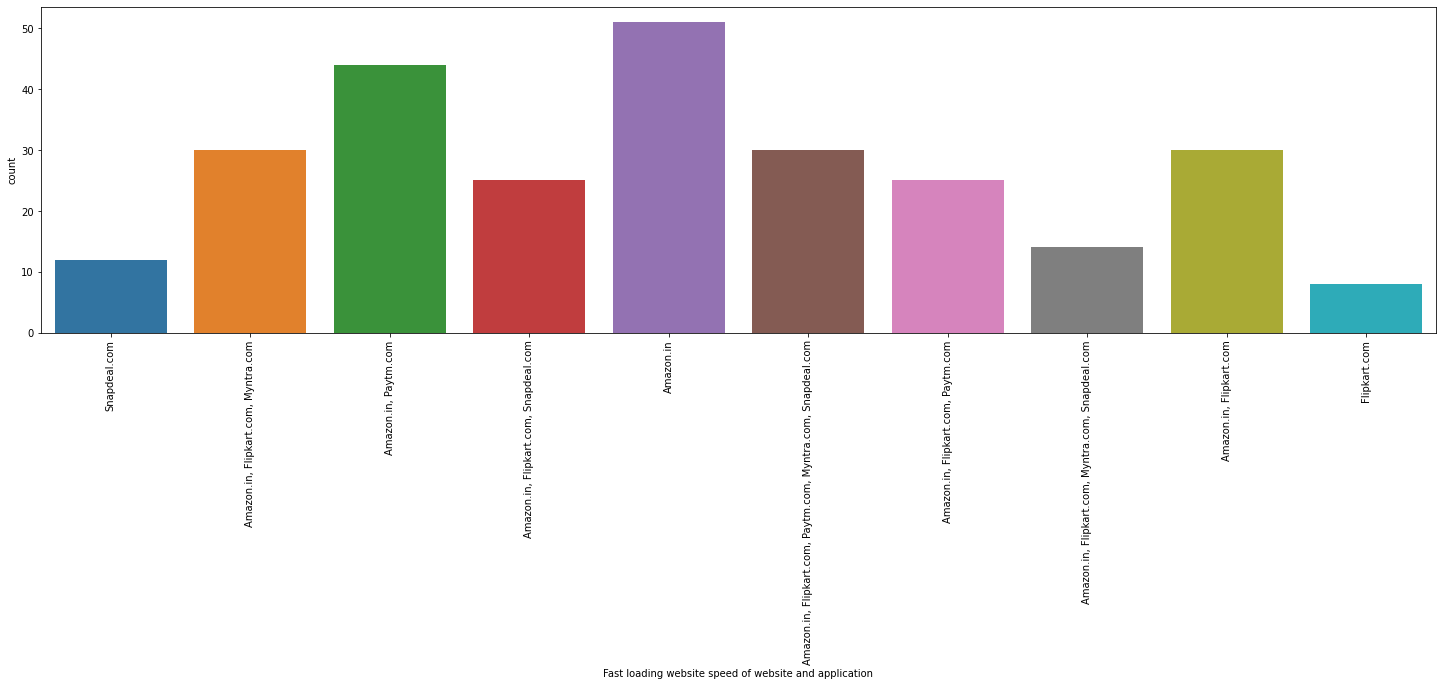

Amazon.in                                                       19.0
Amazon.in, Paytm.com                                            16.0
Amazon.in, Flipkart.com, Myntra.com                             11.0
Amazon.in, Flipkart.com                                         11.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    11.0
Amazon.in, Flipkart.com, Paytm.com                               9.0
Amazon.in, Flipkart.com, Snapdeal.com                            9.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5.0
Snapdeal.com                                                     4.0
Flipkart.com                                                     3.0
Name: Fast loading website speed of website and application, dtype: float64 2


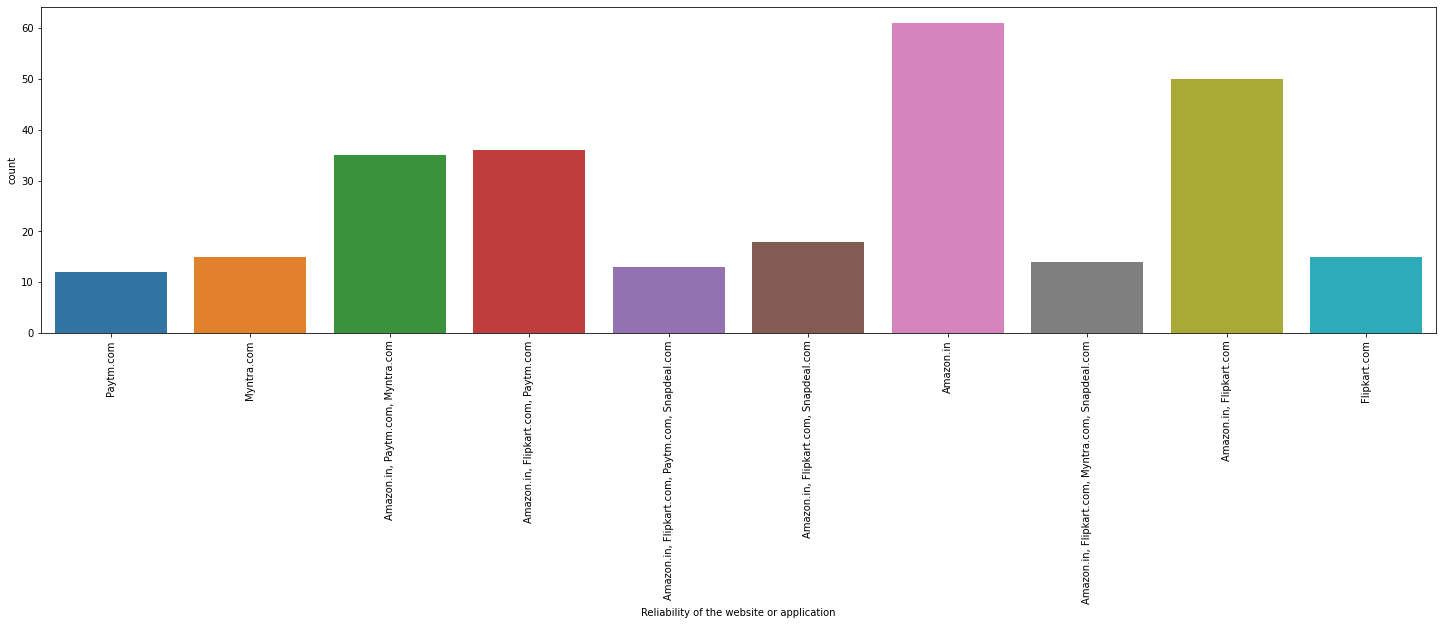

Amazon.in                                            23.0
Amazon.in, Flipkart.com                              19.0
Amazon.in, Flipkart.com, Paytm.com                   13.0
Amazon.in, Paytm.com, Myntra.com                     13.0
Amazon.in, Flipkart.com, Snapdeal.com                 7.0
Myntra.com                                            6.0
Flipkart.com                                          6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     5.0
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com      5.0
Paytm.com                                             4.0
Name: Reliability of the website or application, dtype: float64 2


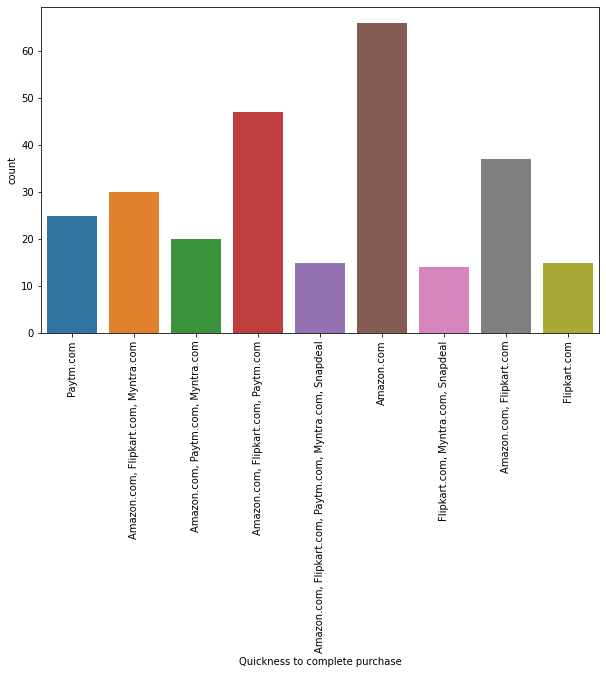

Amazon.com                                                   25.0
Amazon.com, Flipkart.com, Paytm.com                          17.0
Amazon.com, Flipkart.com                                     14.0
Amazon.com, Flipkart.com, Myntra.com                         11.0
Paytm.com                                                     9.0
Amazon.com, Paytm.com, Myntra.com                             7.0
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal     6.0
Flipkart.com                                                  6.0
Flipkart.com, Myntra.com, Snapdeal                            5.0
Name: Quickness to complete purchase, dtype: float64 2


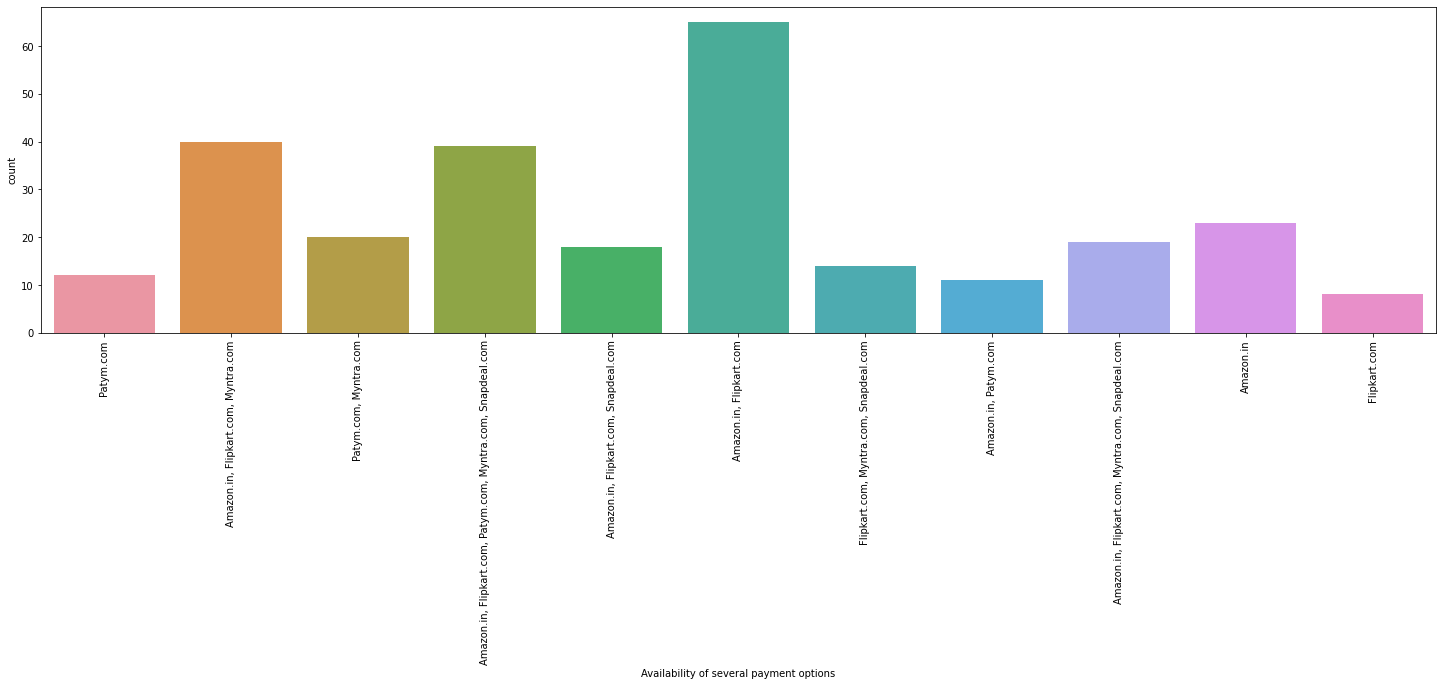

Amazon.in, Flipkart.com                                         24.0
Amazon.in, Flipkart.com, Myntra.com                             15.0
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    14.0
Amazon.in                                                        9.0
Patym.com, Myntra.com                                            7.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                7.0
Amazon.in, Flipkart.com, Snapdeal.com                            7.0
Flipkart.com, Myntra.com, Snapdeal.com                           5.0
Patym.com                                                        4.0
Amazon.in, Patym.com                                             4.0
Flipkart.com                                                     3.0
Name: Availability of several payment options, dtype: float64 2


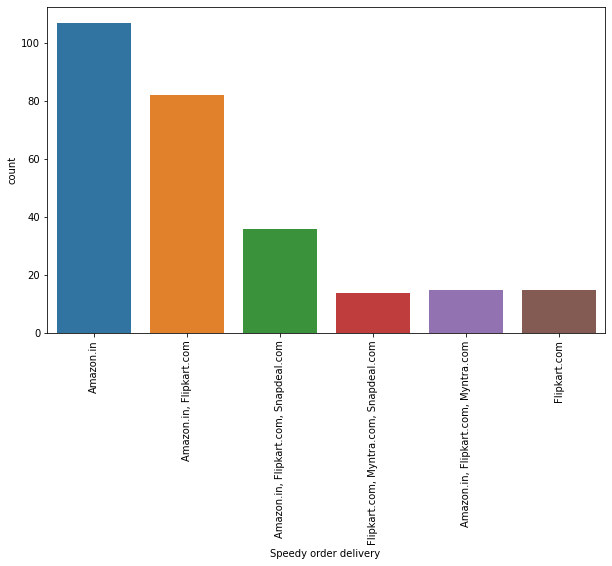

Amazon.in                                 40.0
Amazon.in, Flipkart.com                   30.0
Amazon.in, Flipkart.com, Snapdeal.com     13.0
Amazon.in, Flipkart.com, Myntra.com        6.0
Flipkart.com                               6.0
Flipkart.com, Myntra.com, Snapdeal.com     5.0
Name: Speedy order delivery , dtype: float64 2


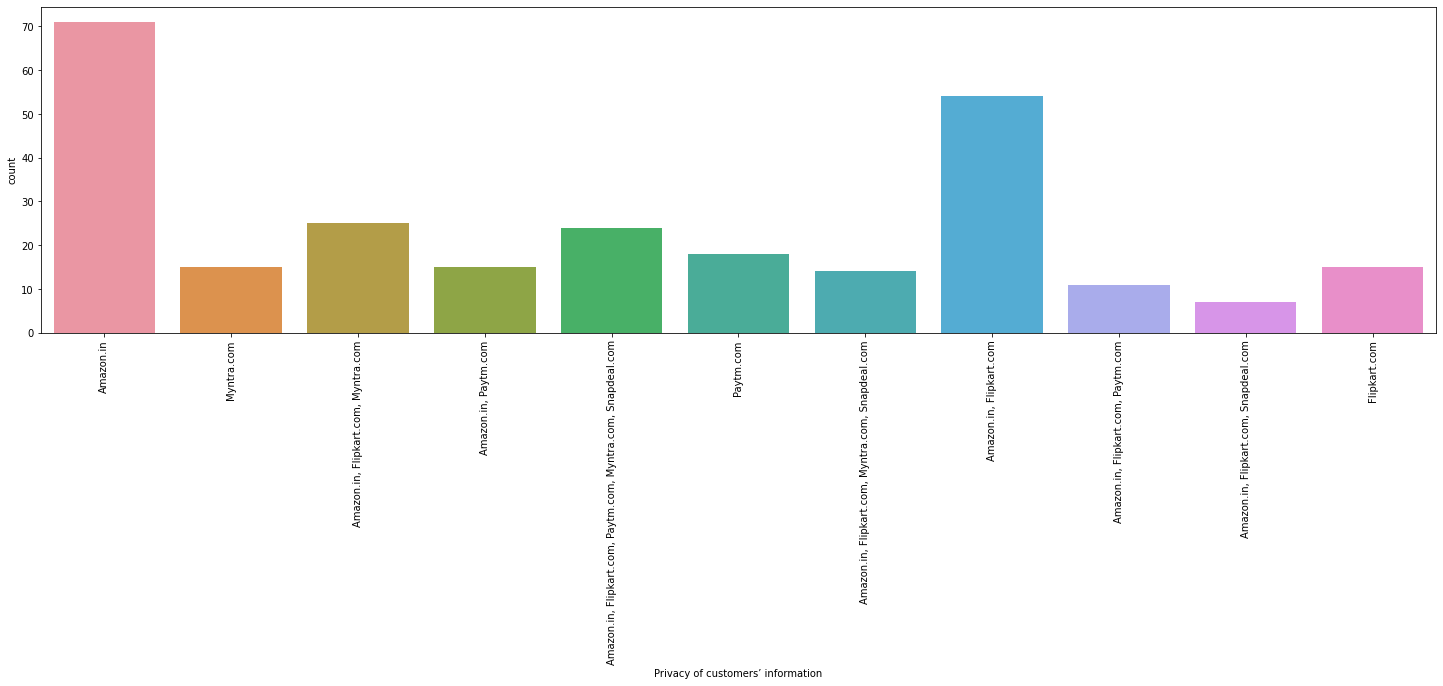

Amazon.in                                                       26.0
Amazon.in, Flipkart.com                                         20.0
Amazon.in, Flipkart.com, Myntra.com                              9.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     9.0
Paytm.com                                                        7.0
Amazon.in, Paytm.com                                             6.0
Myntra.com                                                       6.0
Flipkart.com                                                     6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5.0
Amazon.in, Flipkart.com, Paytm.com                               4.0
Amazon.in, Flipkart.com, Snapdeal.com                            3.0
Name: Privacy of customers’ information, dtype: float64 2


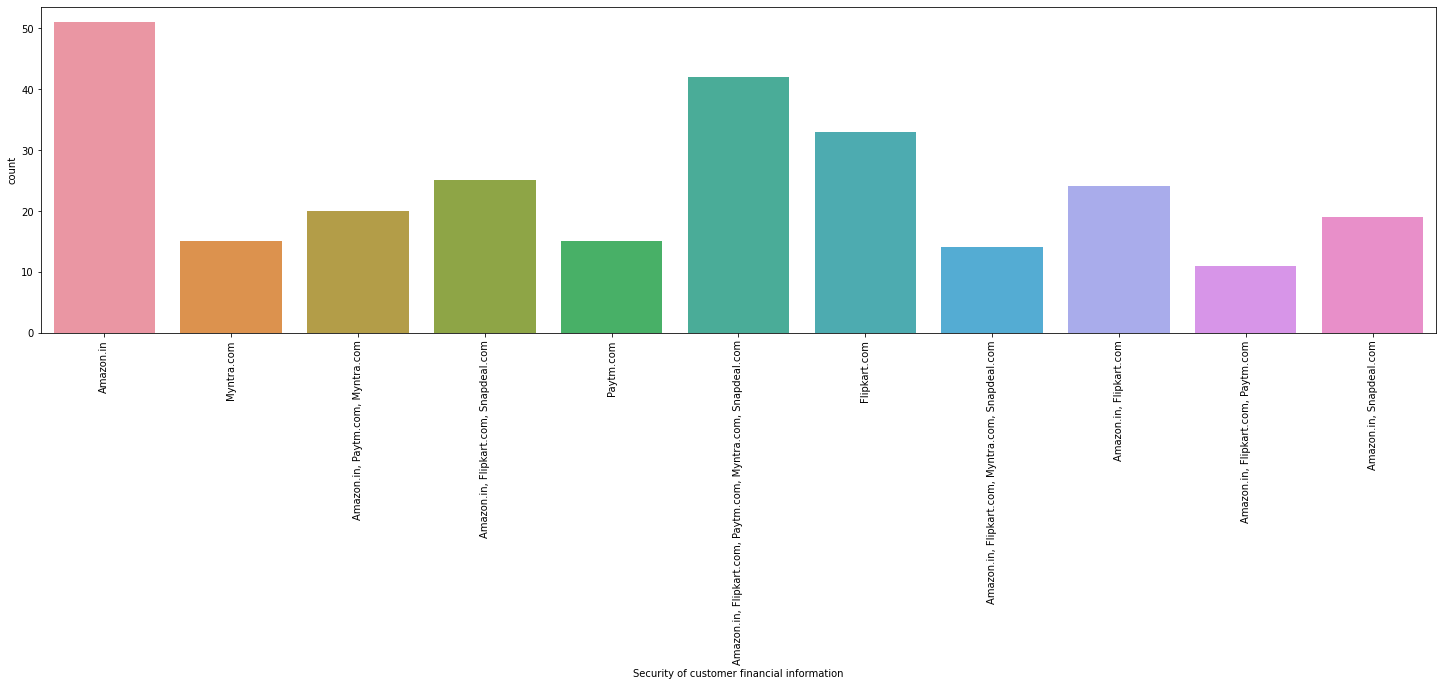

Amazon.in                                                       19.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    16.0
Flipkart.com                                                    12.0
Amazon.in, Flipkart.com, Snapdeal.com                            9.0
Amazon.in, Flipkart.com                                          9.0
Amazon.in, Paytm.com, Myntra.com                                 7.0
Amazon.in, Snapdeal.com                                          7.0
Myntra.com                                                       6.0
Paytm.com                                                        6.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                5.0
Amazon.in, Flipkart.com, Paytm.com                               4.0
Name: Security of customer financial information, dtype: float64 2


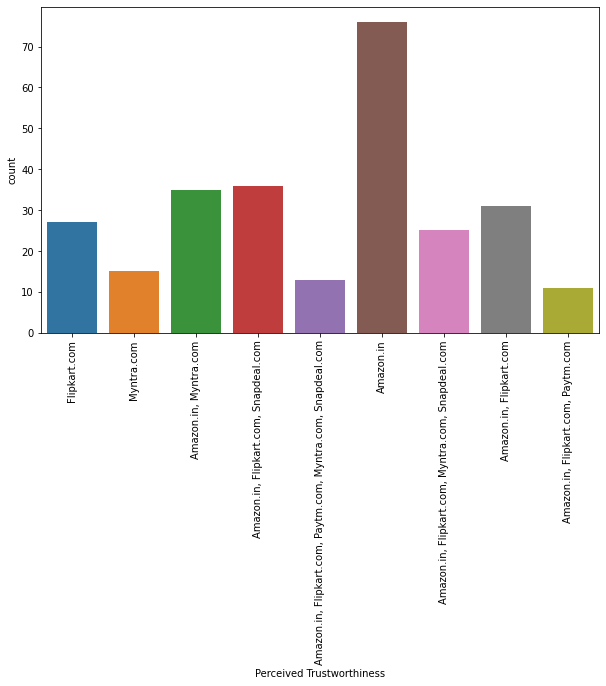

Amazon.in                                                       28.0
Amazon.in, Flipkart.com, Snapdeal.com                           13.0
Amazon.in, Myntra.com                                           13.0
Amazon.in, Flipkart.com                                         12.0
Flipkart.com                                                    10.0
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                9.0
Myntra.com                                                       6.0
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     5.0
Amazon.in, Flipkart.com, Paytm.com                               4.0
Name: Perceived Trustworthiness, dtype: float64 2


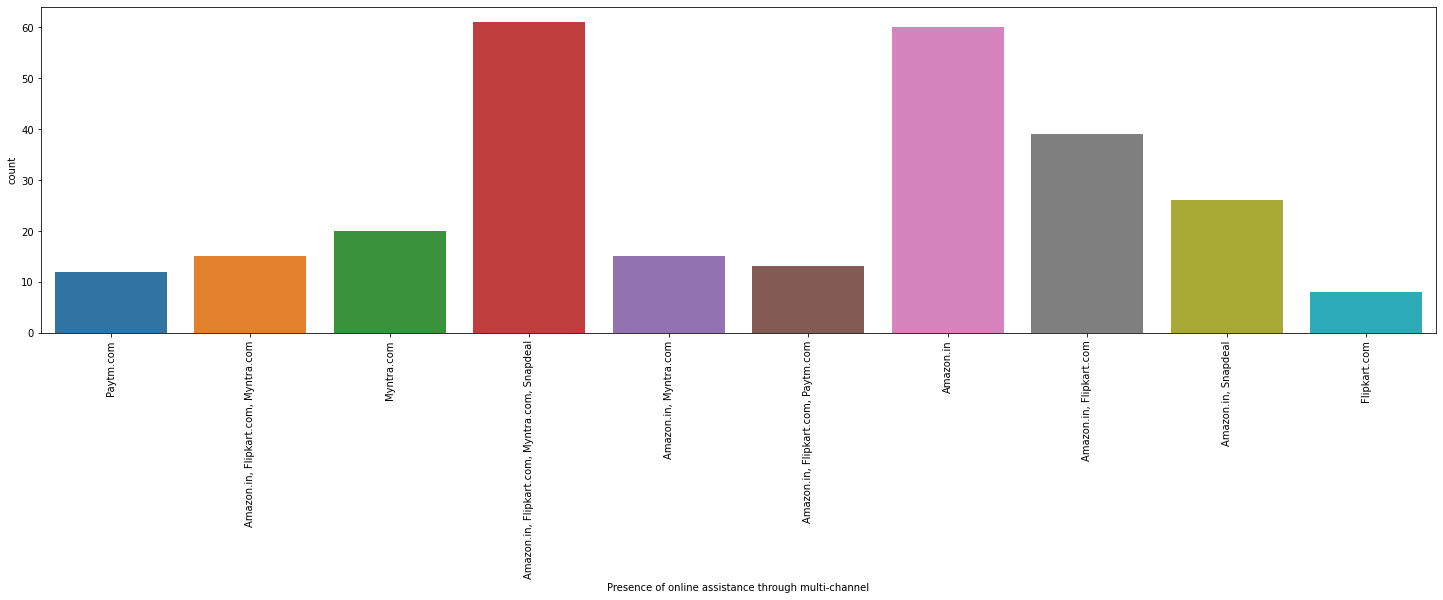

Amazon.in, Flipkart.com, Myntra.com, Snapdeal    23.0
Amazon.in                                        22.0
Amazon.in, Flipkart.com                          14.0
Amazon.in, Snapdeal                              10.0
Myntra.com                                        7.0
Amazon.in, Myntra.com                             6.0
Amazon.in, Flipkart.com, Myntra.com               6.0
Amazon.in, Flipkart.com, Paytm.com                5.0
Paytm.com                                         4.0
Flipkart.com                                      3.0
Name: Presence of online assistance through multi-channel, dtype: float64 2


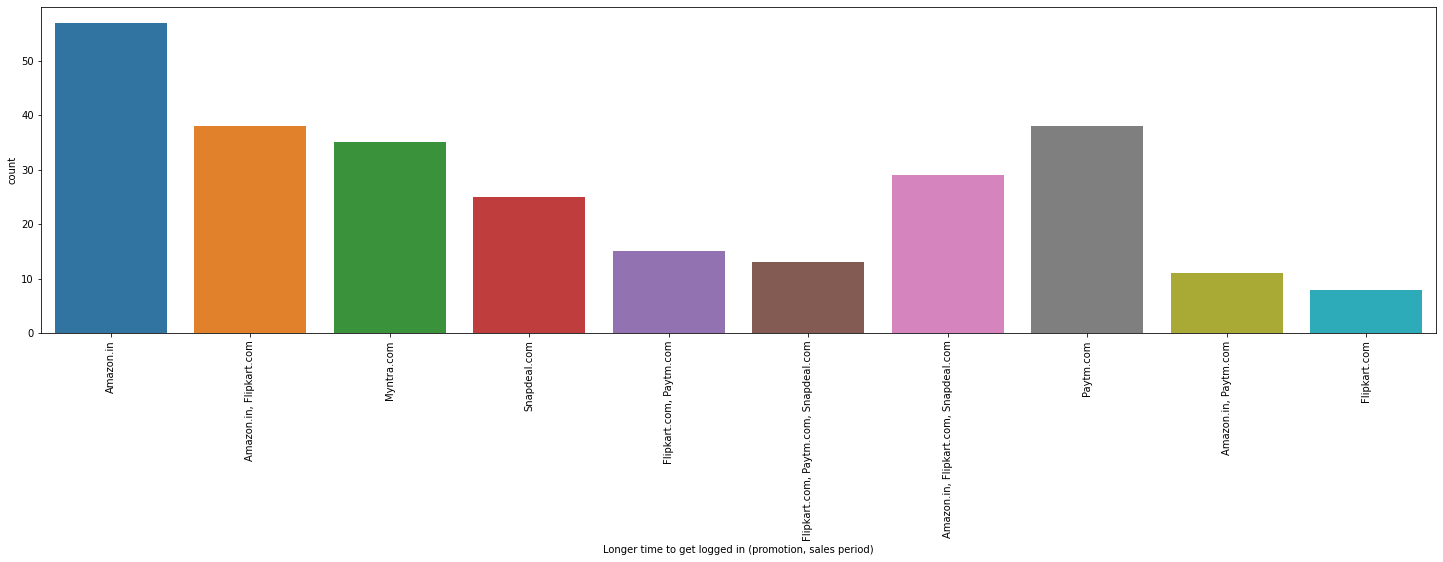

Amazon.in                                21.0
Amazon.in, Flipkart.com                  14.0
Paytm.com                                14.0
Myntra.com                               13.0
Amazon.in, Flipkart.com, Snapdeal.com    11.0
Snapdeal.com                              9.0
Flipkart.com, Paytm.com                   6.0
Flipkart.com, Paytm.com, Snapdeal.com     5.0
Amazon.in, Paytm.com                      4.0
Flipkart.com                              3.0
Name: Longer time to get logged in (promotion, sales period), dtype: float64 2


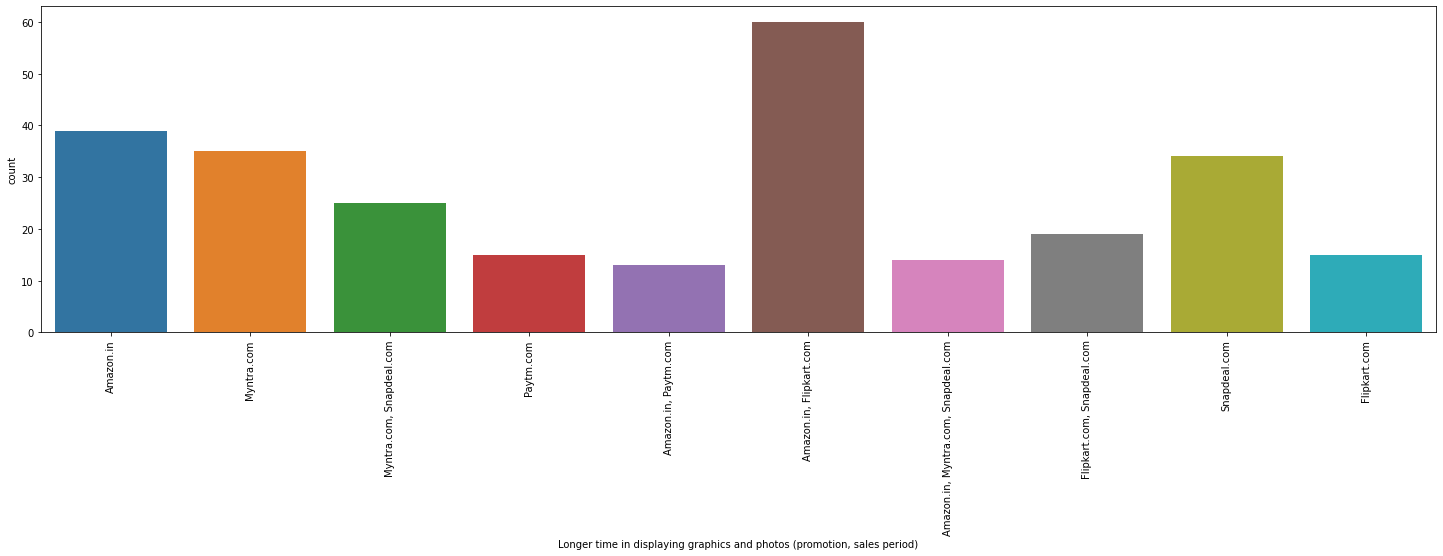

Amazon.in, Flipkart.com                22.0
Amazon.in                              14.0
Myntra.com                             13.0
Snapdeal.com                           13.0
Myntra.com, Snapdeal.com                9.0
Flipkart.com, Snapdeal.com              7.0
Paytm.com                               6.0
Flipkart.com                            6.0
Amazon.in, Myntra.com, Snapdeal.com     5.0
Amazon.in, Paytm.com                    5.0
Name: Longer time in displaying graphics and photos (promotion, sales period), dtype: float64 2


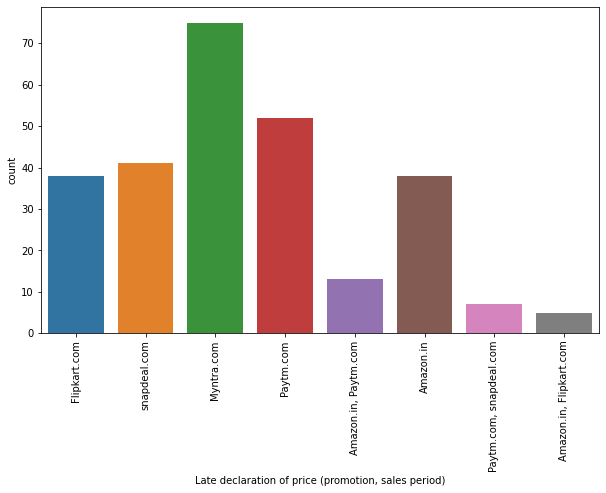

Myntra.com                 28.0
Paytm.com                  19.0
snapdeal.com               15.0
Amazon.in                  14.0
Flipkart.com               14.0
Amazon.in, Paytm.com        5.0
Paytm.com, snapdeal.com     3.0
Amazon.in, Flipkart.com     2.0
Name: Late declaration of price (promotion, sales period), dtype: float64 2


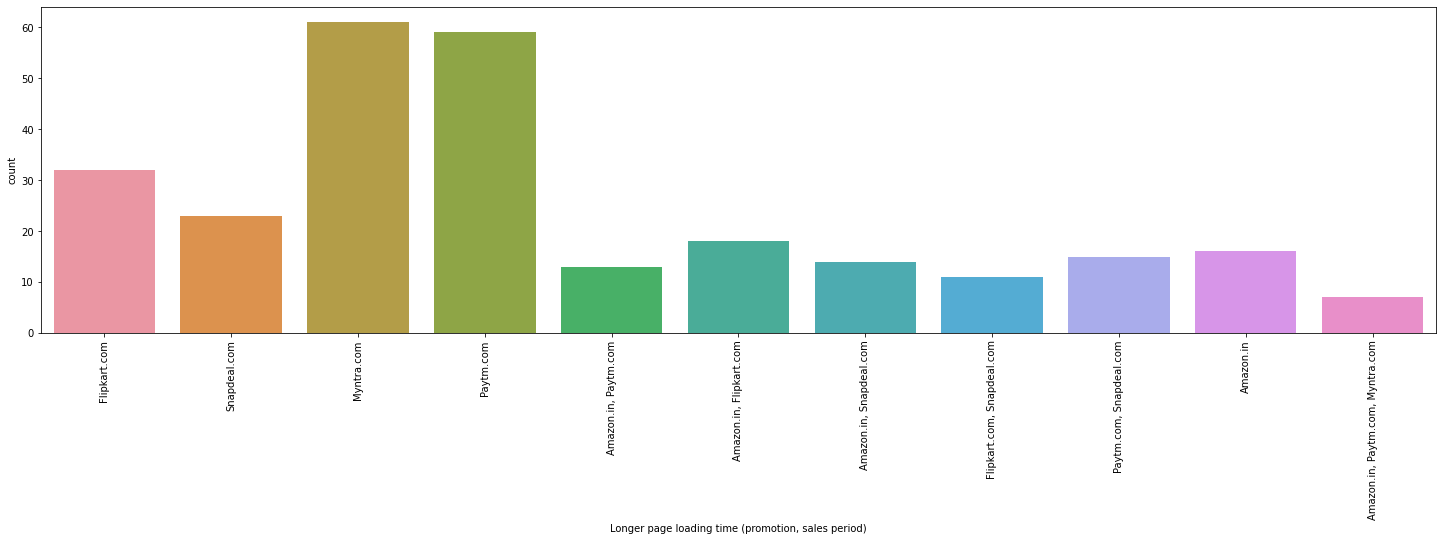

Myntra.com                          23.0
Paytm.com                           22.0
Flipkart.com                        12.0
Snapdeal.com                         9.0
Amazon.in, Flipkart.com              7.0
Amazon.in                            6.0
Paytm.com, Snapdeal.com              6.0
Amazon.in, Snapdeal.com              5.0
Amazon.in, Paytm.com                 5.0
Flipkart.com, Snapdeal.com           4.0
Amazon.in, Paytm.com, Myntra.com     3.0
Name: Longer page loading time (promotion, sales period), dtype: float64 2


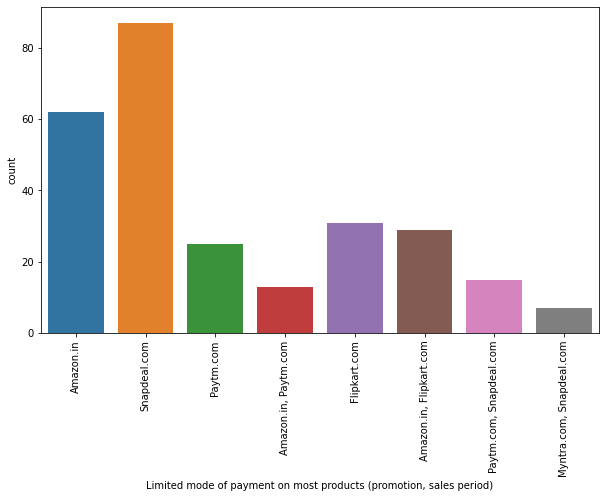

Snapdeal.com                32.0
Amazon.in                   23.0
Flipkart.com                12.0
Amazon.in, Flipkart.com     11.0
Paytm.com                    9.0
Paytm.com, Snapdeal.com      6.0
Amazon.in, Paytm.com         5.0
Myntra.com, Snapdeal.com     3.0
Name: Limited mode of payment on most products (promotion, sales period), dtype: float64 2


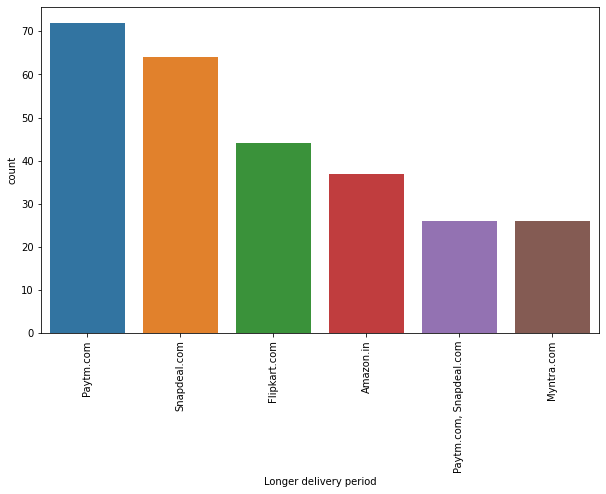

Paytm.com                  27.0
Snapdeal.com               24.0
Flipkart.com               16.0
Amazon.in                  14.0
Paytm.com, Snapdeal.com    10.0
Myntra.com                 10.0
Name: Longer delivery period, dtype: float64 2


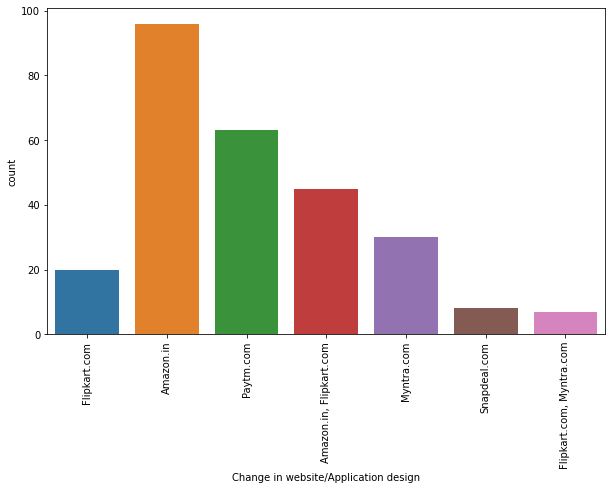

Amazon.in                   36.0
Paytm.com                   23.0
Amazon.in, Flipkart.com     17.0
Myntra.com                  11.0
Flipkart.com                 7.0
Snapdeal.com                 3.0
Flipkart.com, Myntra.com     3.0
Name: Change in website/Application design, dtype: float64 2


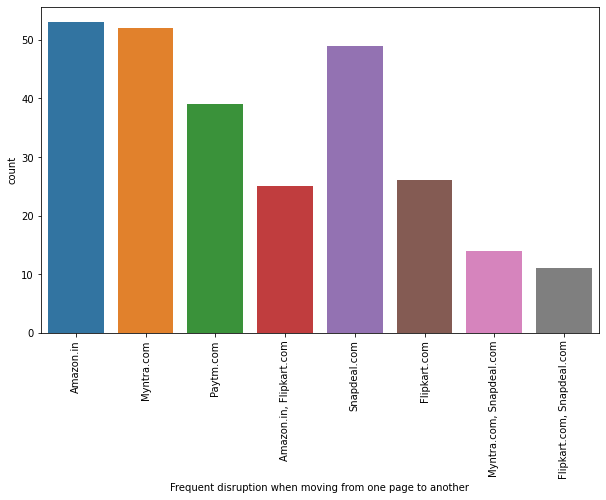

Amazon.in                     20.0
Myntra.com                    19.0
Snapdeal.com                  18.0
Paytm.com                     14.0
Flipkart.com                  10.0
Amazon.in, Flipkart.com        9.0
Myntra.com, Snapdeal.com       5.0
Flipkart.com, Snapdeal.com     4.0
Name: Frequent disruption when moving from one page to another, dtype: float64 2


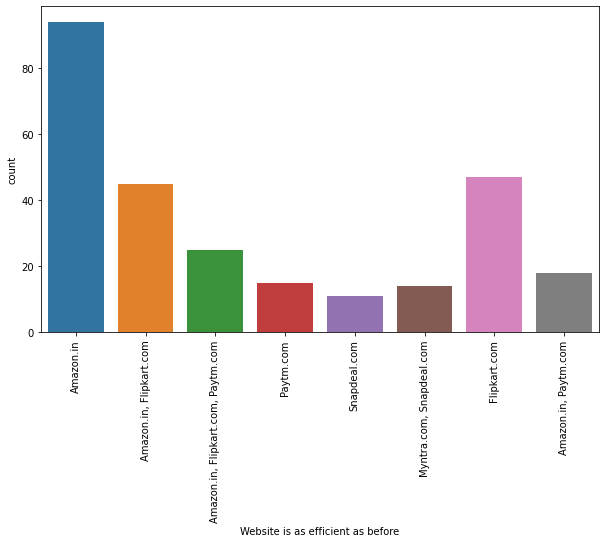

Amazon.in                             35.0
Flipkart.com                          17.0
Amazon.in, Flipkart.com               17.0
Amazon.in, Flipkart.com, Paytm.com     9.0
Amazon.in, Paytm.com                   7.0
Paytm.com                              6.0
Myntra.com, Snapdeal.com               5.0
Snapdeal.com                           4.0
Name: Website is as efficient as before, dtype: float64 2


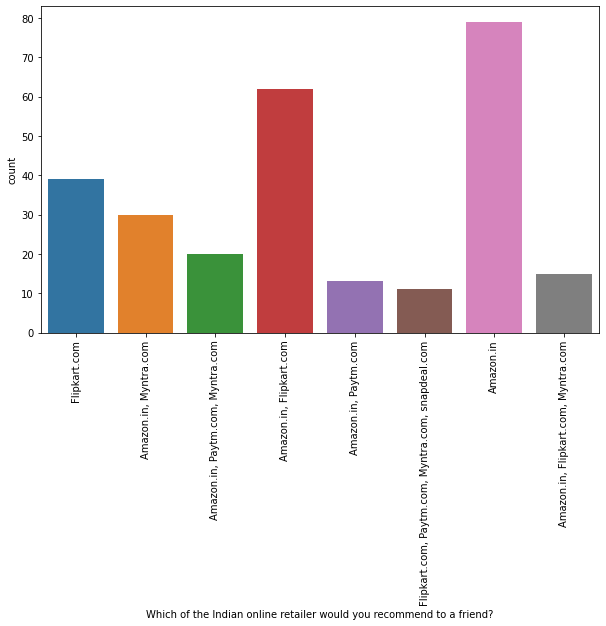

Amazon.in                                            29.0
Amazon.in, Flipkart.com                              23.0
Flipkart.com                                         14.0
Amazon.in, Myntra.com                                11.0
Amazon.in, Paytm.com, Myntra.com                      7.0
Amazon.in, Flipkart.com, Myntra.com                   6.0
Amazon.in, Paytm.com                                  5.0
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com     4.0
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: float64 2


In [65]:
for i in categorical:
    value_count(i)

# Observation

1. Female customers(67%)are more than male customers


2. Customers between 20 to 50 years shopped more from the online store. 75 % of customers are between 20 to 50


3. Delhi,Bangalore,Noida are the cities with high number of buyers


4. 36% customers were found shopping online for more than 4 years , 24% were shopping for 2-3 years



5. IN last one year 42% customers have purchased online less than 10 times,23% cutomers purchased 31-40 times only 2 percent customers purchased more than 42 times


6. 70% customers used mobile internet for online purchase


7. 52% customers used Smartfone for online purchase, 32% used laptop least 4% used tablet


8. 45% customers use Windows phone


9. 80% customers used Google chrome for for online purhcase


10. 86% customers uses Search engine to reach their favorite online store


11. After first visit 32 % customers used search engine to reach online store and 32% uses application.We can  assume that these customers have been retained by the E commerce website as they have downloaded the application on their phone and have a fair chance of shopping again. Also, there are a few customers who are using Desktop/Laptop, for which, there are no applications for online shopping and you have to stick with the web browser.


12. 46% customers take at least 15 minutes before making a purchase, 26% take 6-10 minutes only


13. 55% customers prefer Credit/Debit cards to make payments ,28% preferred COD and 17 % preferred Ewallets


14. 64% customers  abandon their shopping cart sometimes, 19% abandon their cart frequently


15. 49% customres abandon their bag due to better alternative offer, 20% abandon due to promocode not applicable


16. 61% customers have strongly agreed to have easy website content which is easy to understand


17. 43% customers agree that Information on similar product to the one highlighted  is important for product comparison.

18. 70% customers agree that Complete information on listed seller and product being offered is important for purchase decision


19. 90% customers agrees all relevant information on listed products must be stated clearly.


20. 90% cusotmers agreed that the website should be easily navigable


21. 85% cusotmers had no issues with the loading and processing speed


22. 87% customers agree with user friendly  website interface.The online stores should invest heavily in creating user friendly apps and websites,so that the customers do not have to work around much and the overall shopping experience is smooth.


23. 59% customers strongly agree with the convenient paying methods.The reluctance to make online payments is gradually reducing. The acceptance has been built by addressing the trust issue over time by giving customers an option to pay online or to pay Cash On Delivery (COD)


24. 52% customers trust that online store will fufill its part of transaction at stipulated time


25. 85% customers like the organization's readiness to assist with queries


26. Being able to guarantee the privacy of the customer: This also got 69% strongly agree.Costomers are concerned about the unauthorized access to their data.Protecting user privacy will enable stores to drive more revenue and gain more customers


27. Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.): 90% customers agreed to it.  In case one channel is not available, customers can reach out to multiple channels which again is an important factor.Being able to communicate easily can make the difference in both their shopping experience as well as fulfill  business goals of online store.

28. 50% agree that online shopping gives monetary benefit and discounts to the customer:Most online shopping sites offer amazing round-the-year discounts. Banks and Digital Wallets have happily jumped on the online shopping bandwagon by providing Reward Points, and instant CashBack offers in addition to brand discounts,which will help to gain new customers


29. 60% customers enjoys online shopping


30. 84% customers agree that online shopping is convenient and flexible:


31. 90% customers agree that return and replacement policy helps them making purchase decision. It is evident from the fact that people cannot actually try & touch the products ,they are purchasing before it  reaches home and they would want to return or replace in case of dissatisfaction. Online shopping websites should make strategies around easy return and replacement policy if they want to retain their customers.

32. Around 50% customers agree that gaining access to loyality program is a benefit of shopping online


33. Displaying quality Information on the website improves satisfaction of customers:80% customer agreed to it.It means displaying quality information  have a significant association with  customer satisfaction, and repurchase intentions


34. 95% customers are satisfied while shopping on a good quality website


35. Net Benefit derived from shopping online can lead to users satisfaction:90% customers agreed


36. User satisfaction cannot exist without trust:85% customers agree that customer satisfaction cannot be built without trust.Trust is important factor to attract e-commerce buyers.So, it is important for companies to learn how to manage consumers' trust 


37.  Offering a wide variety of listed product in several category:75% use agreed.


38. 86% customers like to have complete and relevant information


39. 80% customers agree to receive monetary savings while shopping online


40. 50% agree with the convenience of patronizing the online retailer


41. 50% customers agree that online shopping give the sense of adventure


42. only 30% customers agree that online shopping enhances their social status


43. 45% customers feel gratified while shopping with their favorite retailer


44. 45% customers feel that shopping onine helps them fulfill certain roles


45. 85% customers agree they get value for their money while shopping online


##### Observations from Multiple Options based Questions .ie related to company name specific parameters,after 47th rows

46. Maximum people have shopped from these 5 companies - Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com.


47. 48% customers says flipkart, amaon shows wide variety of products


48. 37% customers like flipkart and amazon in terms of displaying complete and relevant information of the products


49. In terms of speed Amazon.in is liked by 90% customers , 60 % like Flipkart , 27% Myntra


50. 78% customers trust Amazon to be reliable , 55% likes flipkart , 25% Myntra


51. 80% customers likes Amazon's quickness to complete the purchase , 60% likes Flipart's, 30% likes myntra's


52. 86% likes Amazon's delivery speed , 56% likes flipkart's , 5% likes myntra's


53. 82% customers trust amazon in terms of keeping the privacy of their data, 56% trust flipkart 20% trust myntra , 12 % trust snapdeal


54. 70% trust amazon in terms of keeping their financial information secured, 56% flipakrt, 34% myntra , 21% snapdeal , 22@ paytm


55. 84% customers believe Amazon perceived trustworthiness, 43% - Flipkart , 33% - Myntra ,snapdeal 27% snapdeal


56. 86% customers like Amazon in terms of online assistance through multi channel , 51% -Flipkart ,42% myntra


57. 50% customers agree that Amazon takes longer time to log them in while in sales period/promotions , 39% goes with flipkart, 13% goes with myntra , 16%-snapdeal


58. 46% customers says that amazon takes londer time in dsiplaying photos in sales/promition , 35%- flipkart, 21% snapdeal, 14% myntra, 11% paytm


59. In terms of late declaration of price in promotion/sales --28% goes with myntra, 21% amazon , 16% flipkart , 18% snapedeal, 23% paytm


60. In terms of longer page loading in promotion/sales -- 26% customer goes with myntra, 23% -flipkart,23% -amazon,24% snapdeal


61. In terms of limited mode of payment on most products during sales period/promotions -- 41% goes with snapdeal, 40% -amazon,23% flipkart, 20% paytm and only 3% myntra . Hence myntra gives most payment options during sales/promotion.


62. In terms of time taken in product delivery-- paytm has highest votes of 37%, snapdeal 24%, flipkart 16%, amazon 14% and snapdeal and myntra 10%. hence snapdeal and myntra takes minimum time for delivery among all.


63. 20% customers dislikes disruptions while moving to another page on amazon, 24% on myntra, 27% snapdeal, 14% paytm,23% snapdeal


64. 61% customers says that amazon website is as efficient as before, 43% for flipkart,22% for paytm,9% for snapdeal 

65. 81% customers would like to recommend amazon to a friend, 43% would like flipkart , 22% would like for myntra ,9% for paytm and least 4 % would like to recommed snapdeal

In [66]:
def value_count(column):
    diff_count=len(df[column].value_counts())
    if diff_count<5:
        plt.figure(figsize=(10,5))
    elif diff_count<10:
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
    elif diff_count<20:
        plt.figure(figsize=(25,6))
        plt.xticks(rotation=90)
    else:
        plt.figure(figsize=(20,6))
        plt.xticks(rotation=90)
    sns.countplot(x=column,hue='1Gender of respondent',data=df)
    plt.show()
   

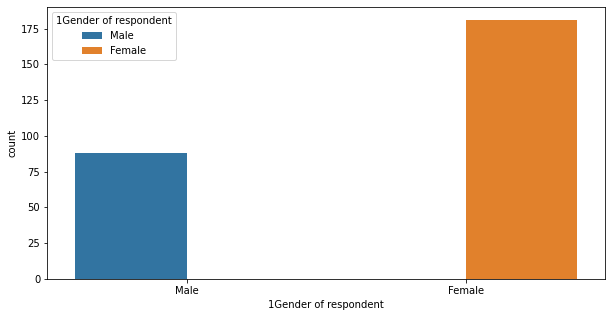

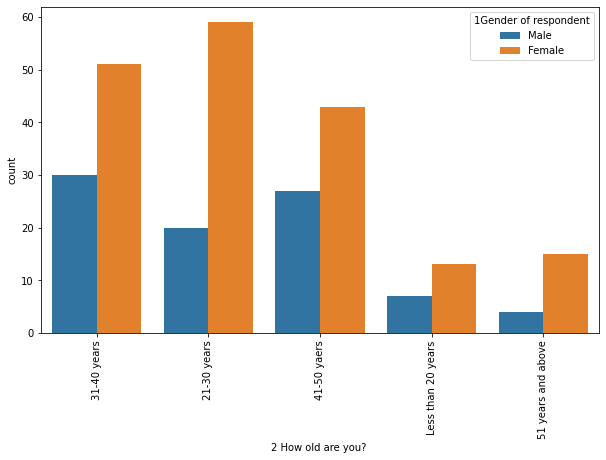

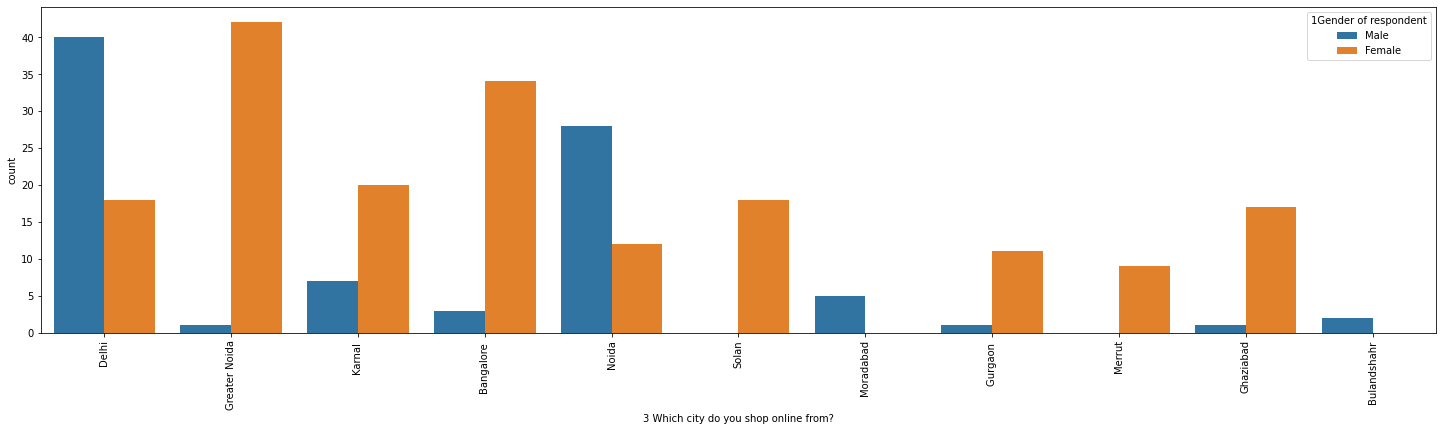

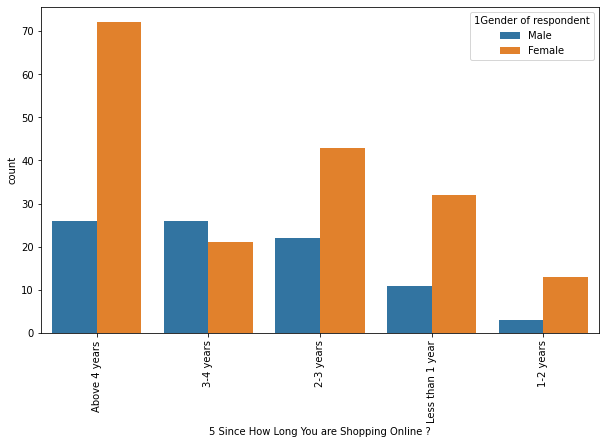

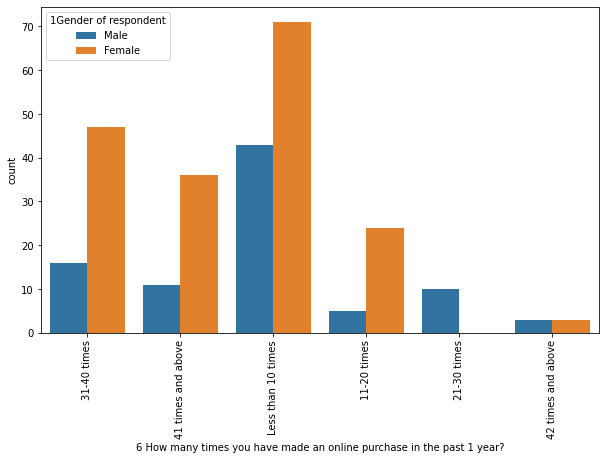

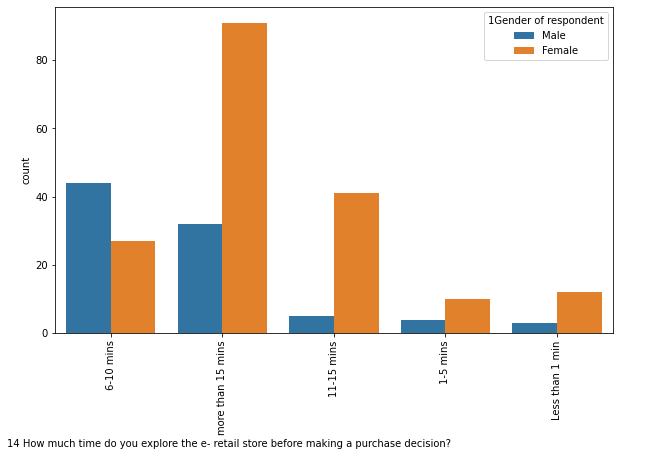

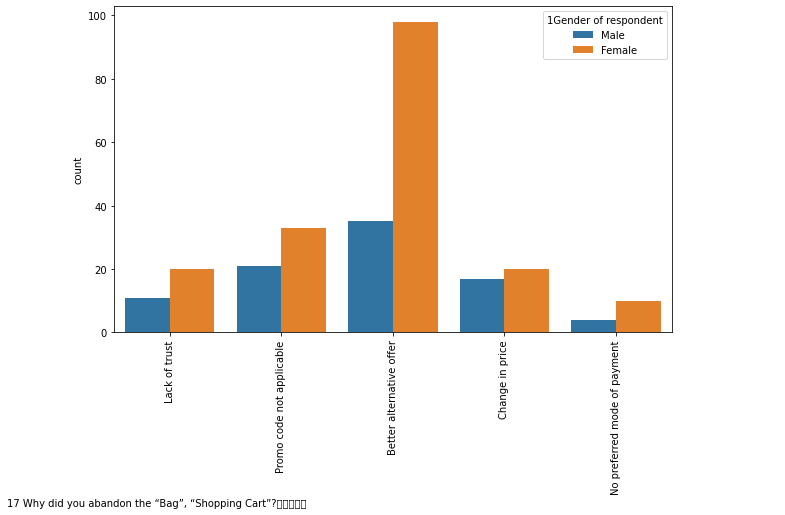

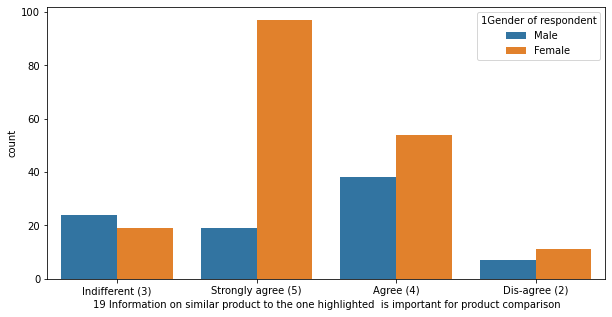

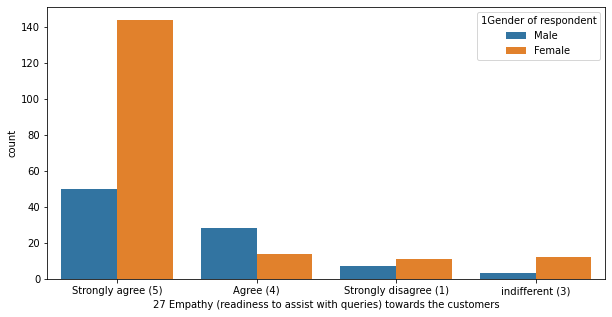

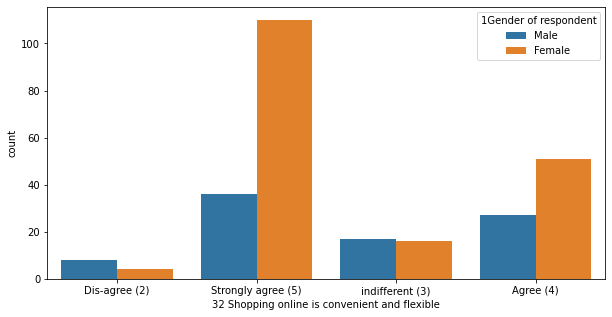

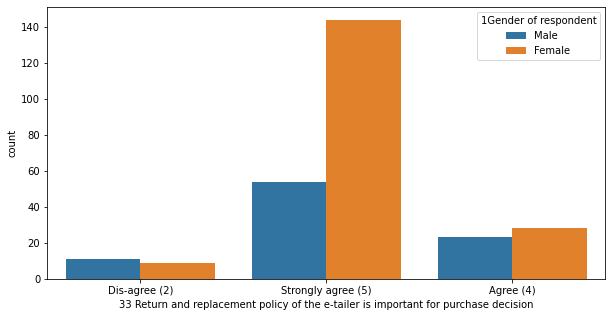

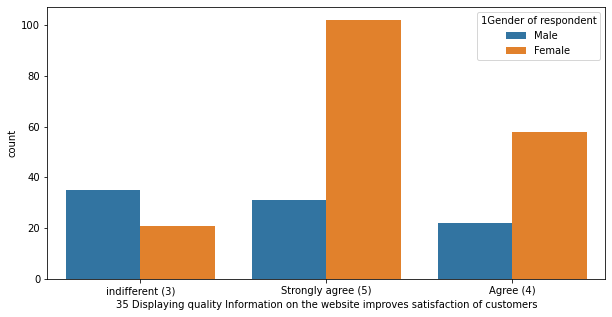

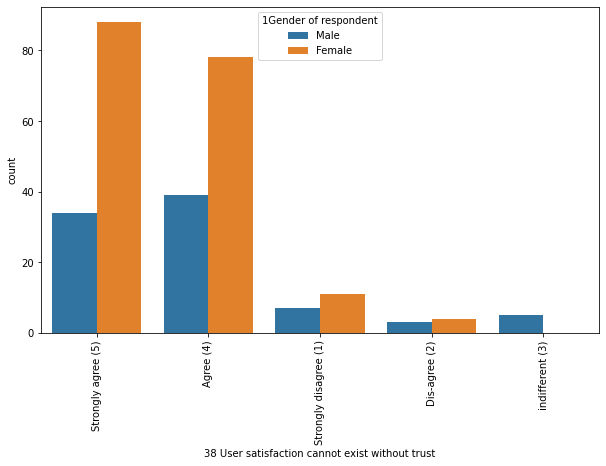

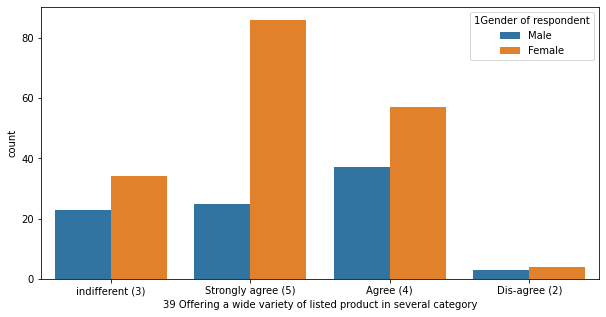

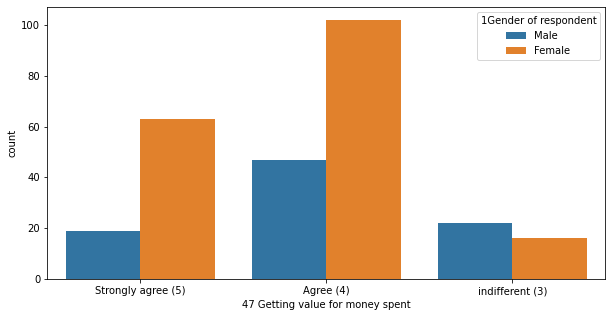

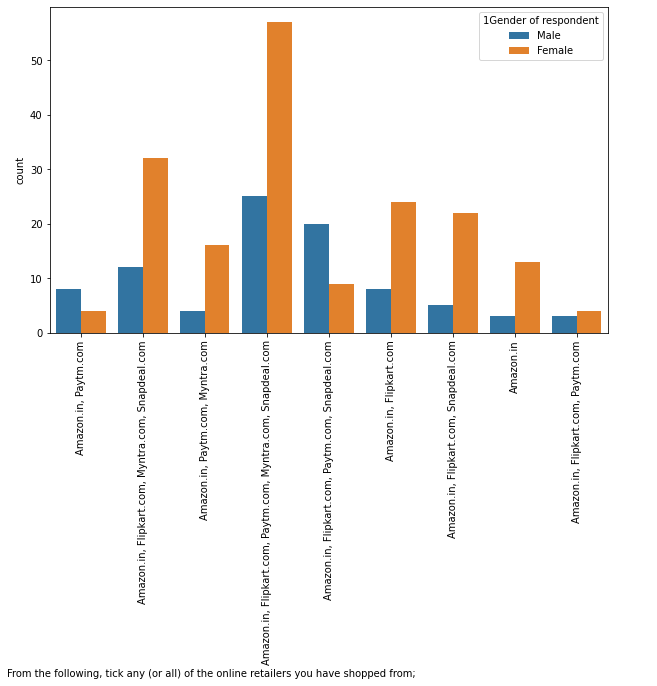

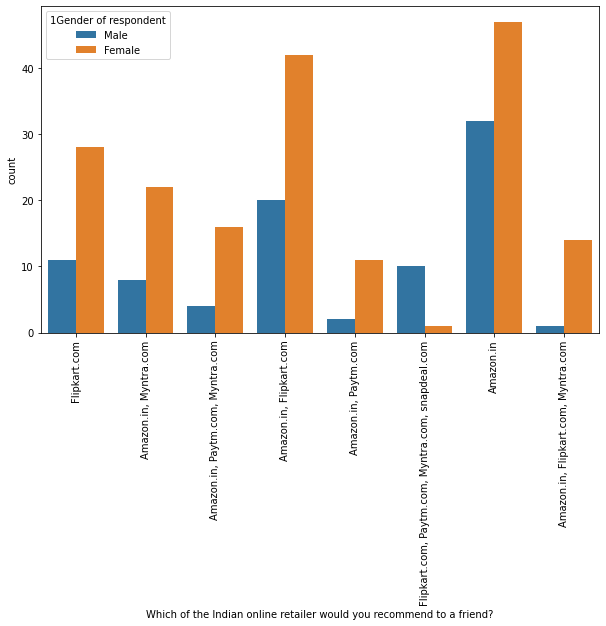

In [67]:
df2=df.iloc[:,[0,1,2,4,5,13,16,18,26,31,32,34,37,38,46,47,70]]
for i in df2:
    value_count(i)

Even though females are dominant in the dataset, female population using ecommerce is not dominant everywhere
In Delhi and Noida more number of males are using ecommerce than female.

Bulandshahr and Moradabad - both cities in UttarPradesh has no female shoppers at all.


Number of females who  are shopping since long are more than number of males.

Frequency of females shopping online is more than males 

Most of the females usually takes more than 15 min,while most of the male spend 6-10 min before making a purchase decision.

More females strongly agree with the fact that there must be similar products to compare.
Males do agree with the fact but the data suggests that it is okay if there exists a product but also okay if there does not exist one.


# Bivariate analysis

In [68]:
df['6 How many times you have made an online purchase in the past 1 year?'].value_counts()

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64

1Gender of respondent vs  How many times you have made an online purchase in the past 1 year?


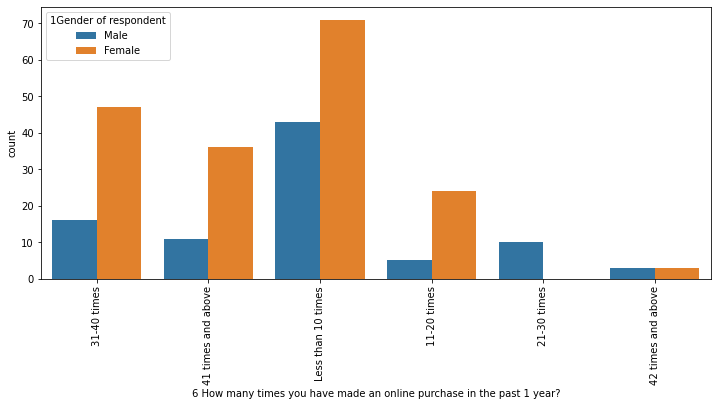

2 How old are you?  vs  How many times you have made an online purchase in the past 1 year?


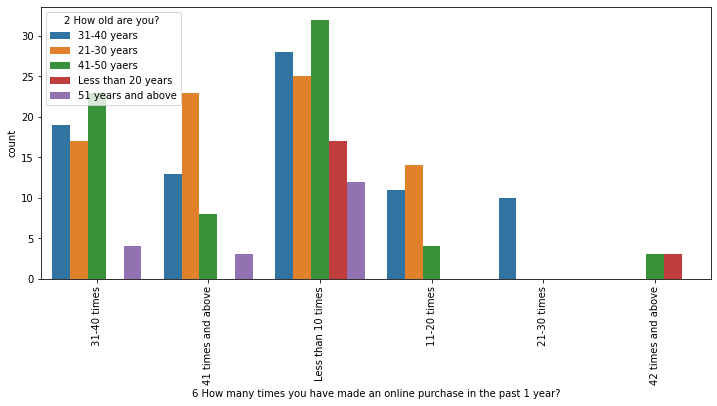

3 Which city do you shop online from? vs  How many times you have made an online purchase in the past 1 year?


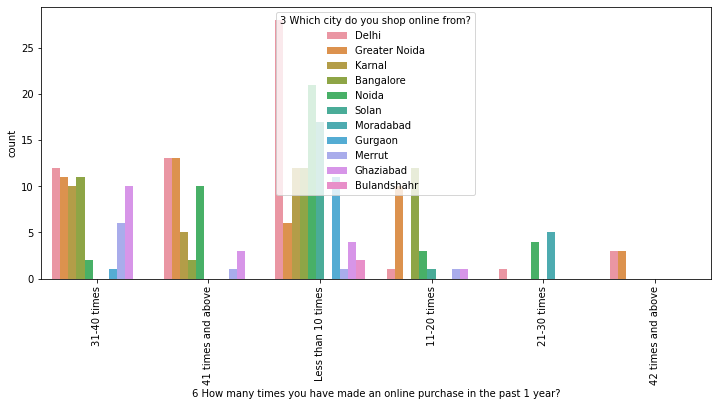

5 Since How Long You are Shopping Online ? vs  How many times you have made an online purchase in the past 1 year?


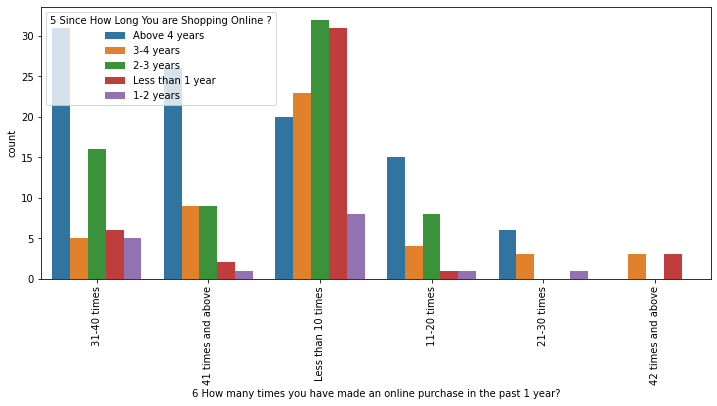

6 How many times you have made an online purchase in the past 1 year? vs  How many times you have made an online purchase in the past 1 year?


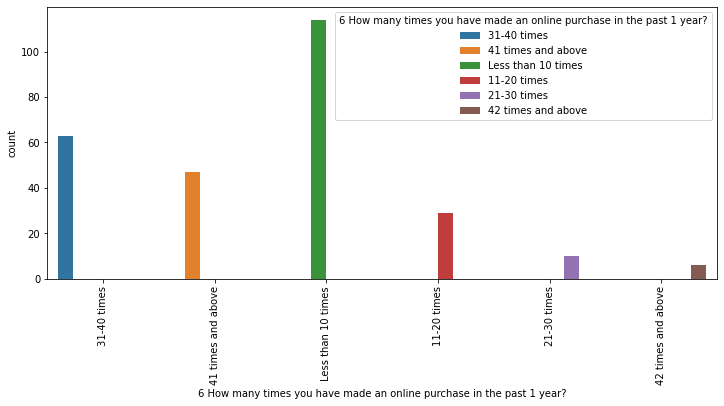

14 How much time do you explore the e- retail store before making a purchase decision?                                                                    vs  How many times you have made an online purchase in the past 1 year?


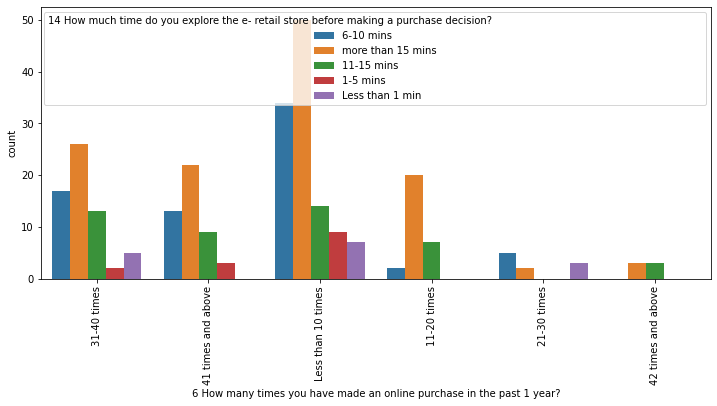

15 What is your preferred payment Option?					                                                                                                                                vs  How many times you have made an online purchase in the past 1 year?


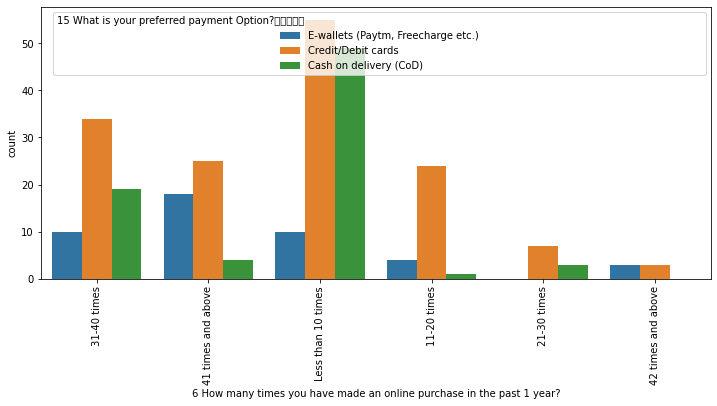

17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                        vs  How many times you have made an online purchase in the past 1 year?


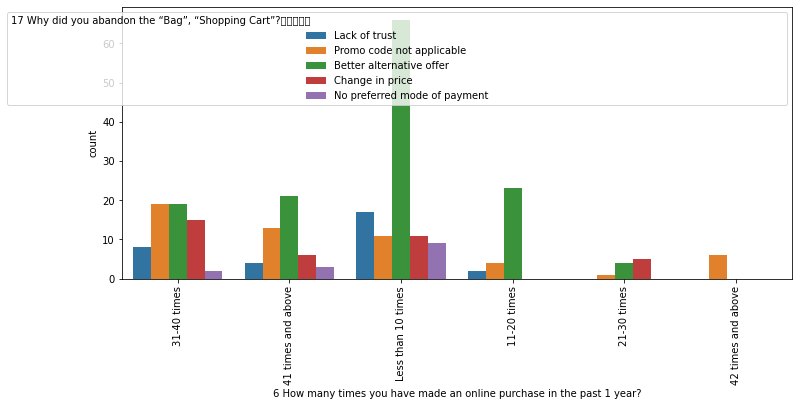

27 Empathy (readiness to assist with queries) towards the customers vs  How many times you have made an online purchase in the past 1 year?


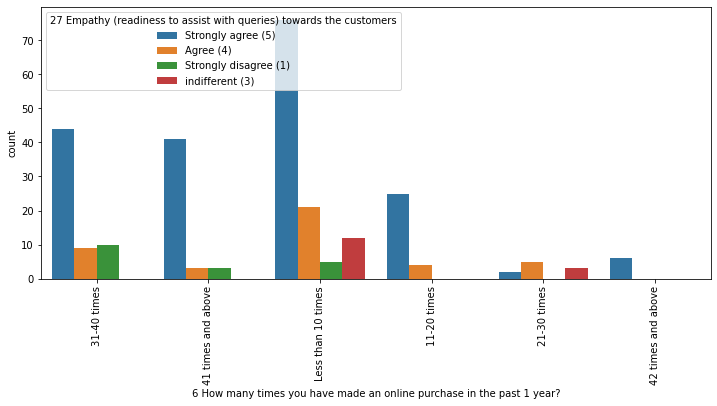

32 Shopping online is convenient and flexible vs  How many times you have made an online purchase in the past 1 year?


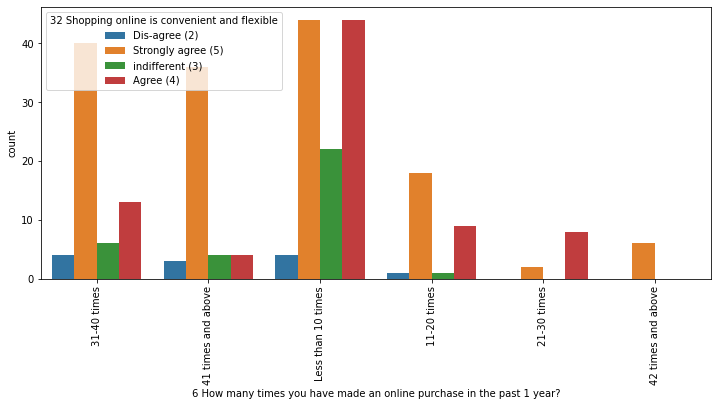

33 Return and replacement policy of the e-tailer is important for purchase decision vs  How many times you have made an online purchase in the past 1 year?


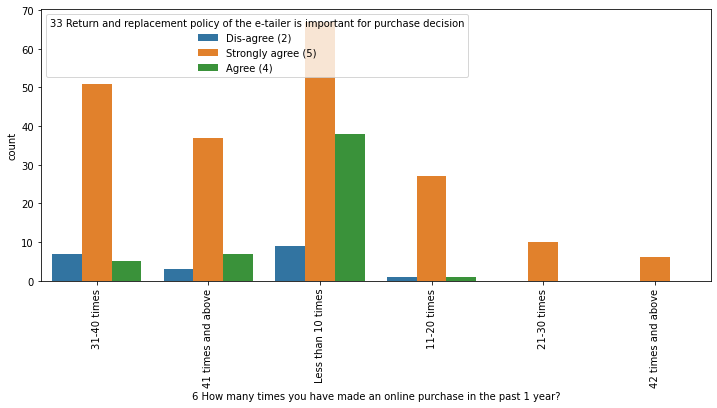

35 Displaying quality Information on the website improves satisfaction of customers vs  How many times you have made an online purchase in the past 1 year?


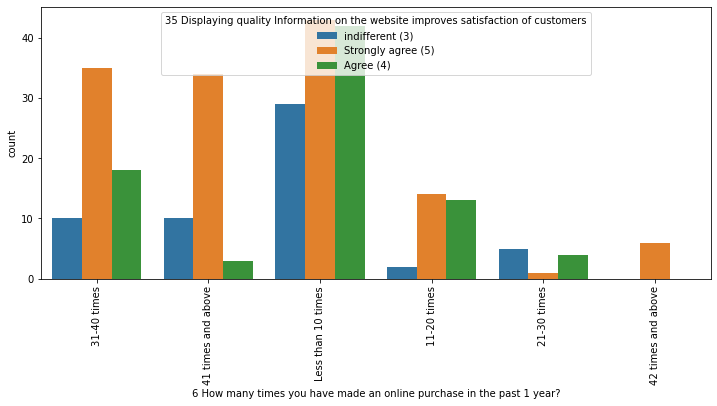

38 User satisfaction cannot exist without trust vs  How many times you have made an online purchase in the past 1 year?


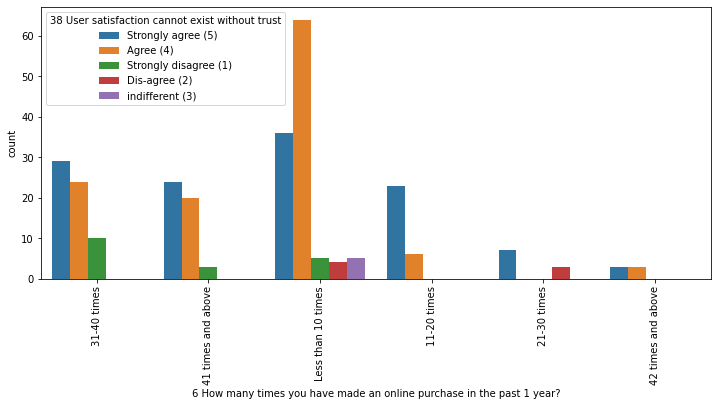

39 Offering a wide variety of listed product in several category vs  How many times you have made an online purchase in the past 1 year?


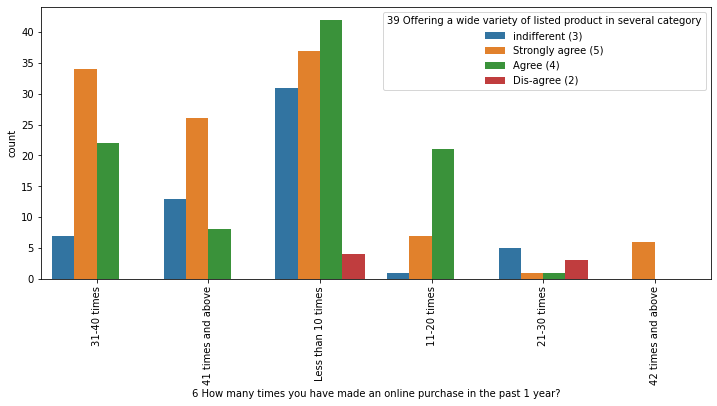

47 Getting value for money spent vs  How many times you have made an online purchase in the past 1 year?


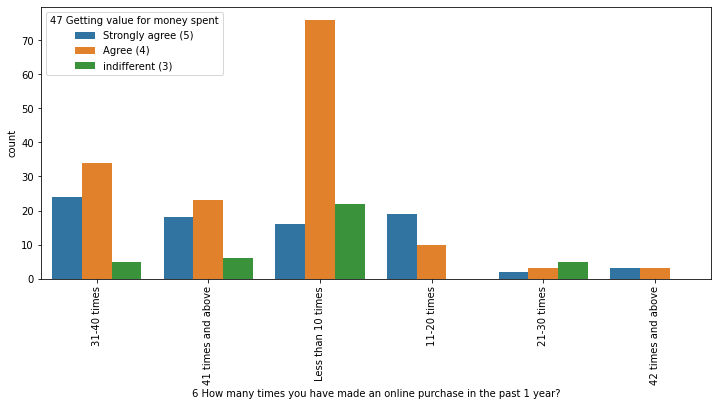

From the following, tick any (or all) of the online retailers you have shopped from;                                                                            vs  How many times you have made an online purchase in the past 1 year?


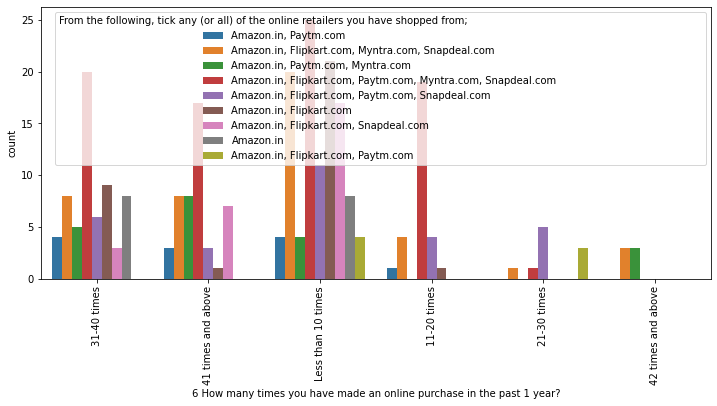

Easy to use website or application vs  How many times you have made an online purchase in the past 1 year?


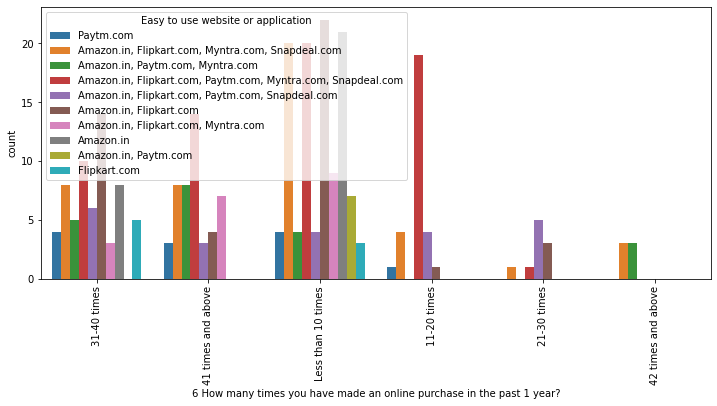

Visual appealing web-page layout vs  How many times you have made an online purchase in the past 1 year?


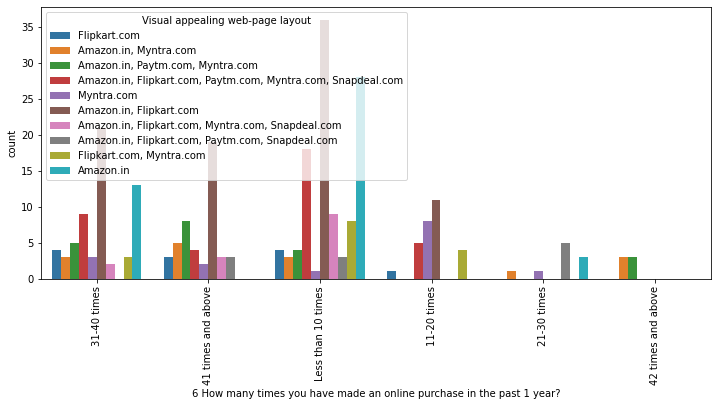

Wild variety of product on offer vs  How many times you have made an online purchase in the past 1 year?


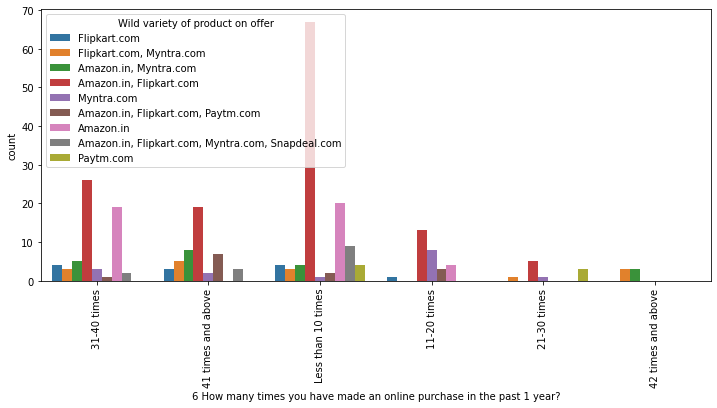

Complete, relevant description information of products vs  How many times you have made an online purchase in the past 1 year?


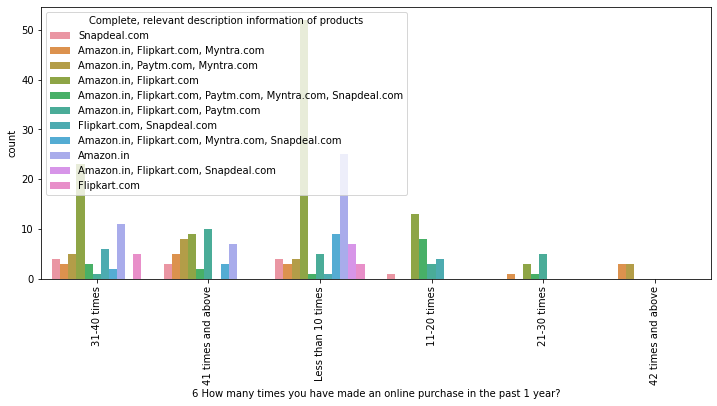

Fast loading website speed of website and application vs  How many times you have made an online purchase in the past 1 year?


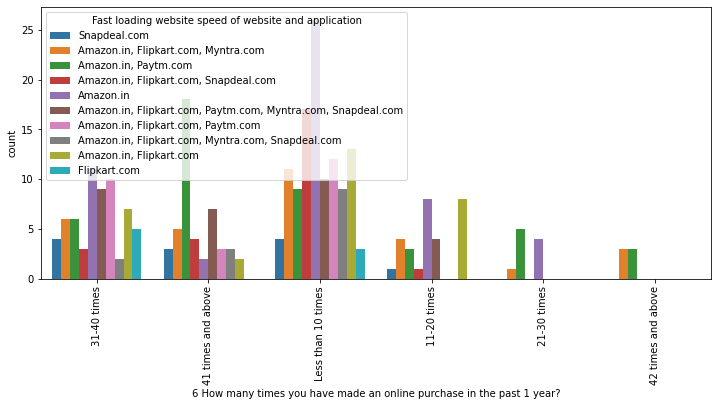

Reliability of the website or application vs  How many times you have made an online purchase in the past 1 year?


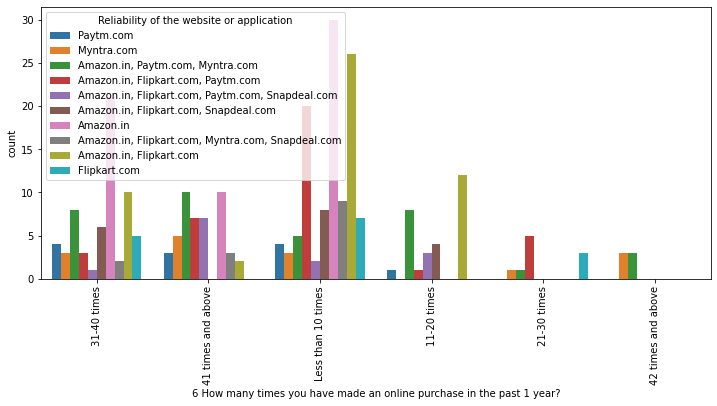

Quickness to complete purchase vs  How many times you have made an online purchase in the past 1 year?


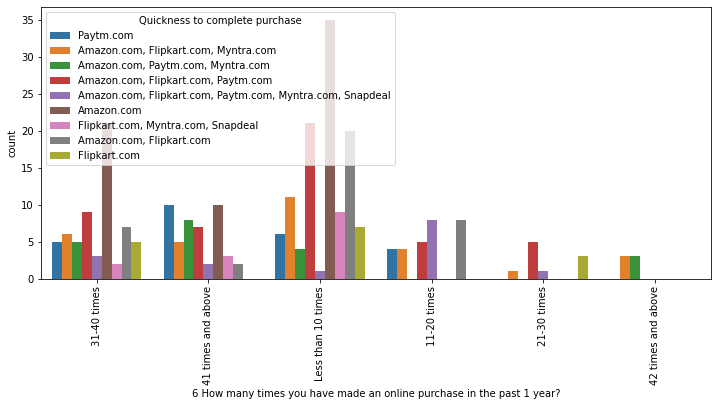

Availability of several payment options vs  How many times you have made an online purchase in the past 1 year?


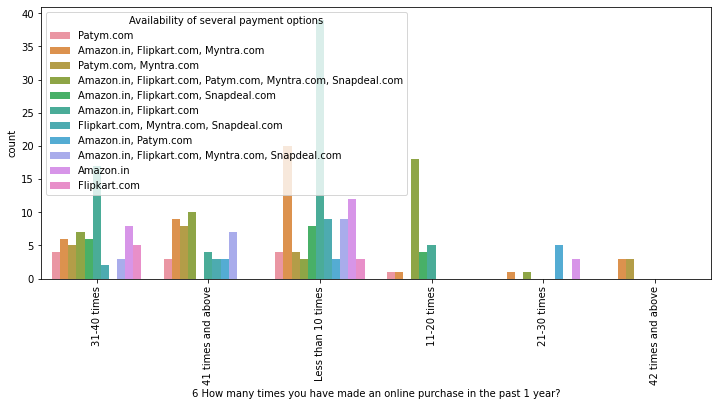

Speedy order delivery  vs  How many times you have made an online purchase in the past 1 year?


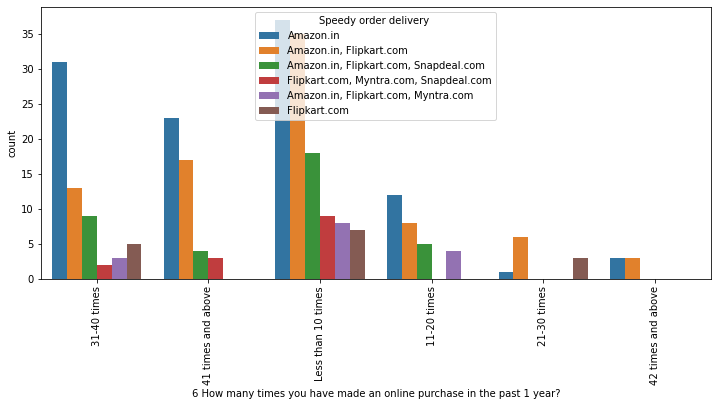

Privacy of customers’ information vs  How many times you have made an online purchase in the past 1 year?


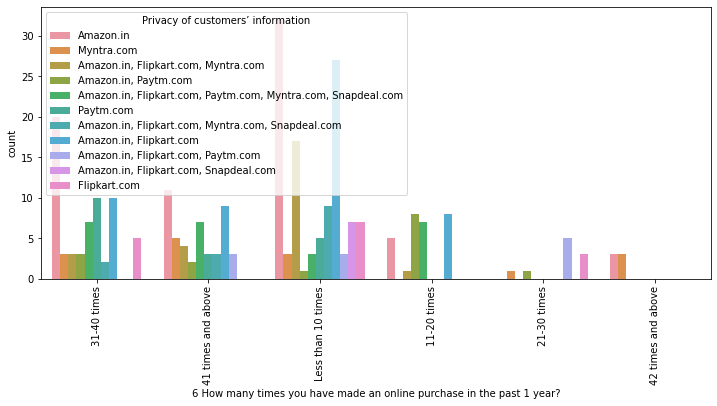

Security of customer financial information vs  How many times you have made an online purchase in the past 1 year?


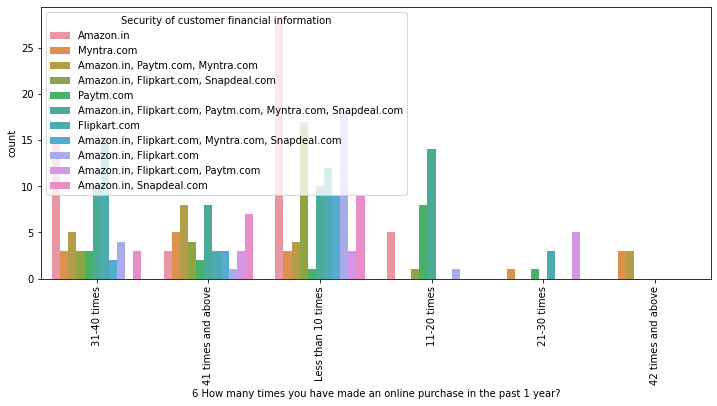

Perceived Trustworthiness vs  How many times you have made an online purchase in the past 1 year?


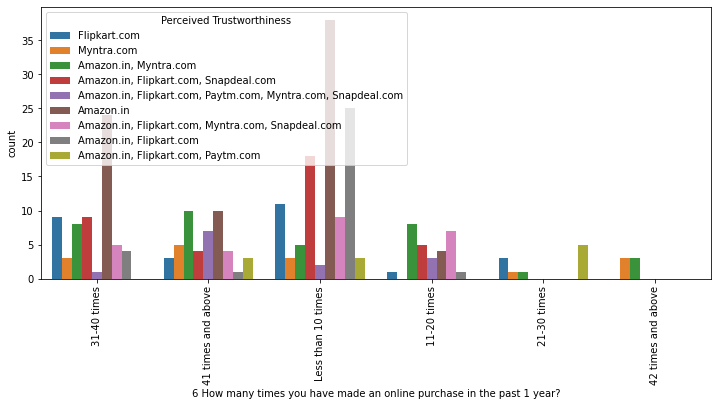

Presence of online assistance through multi-channel vs  How many times you have made an online purchase in the past 1 year?


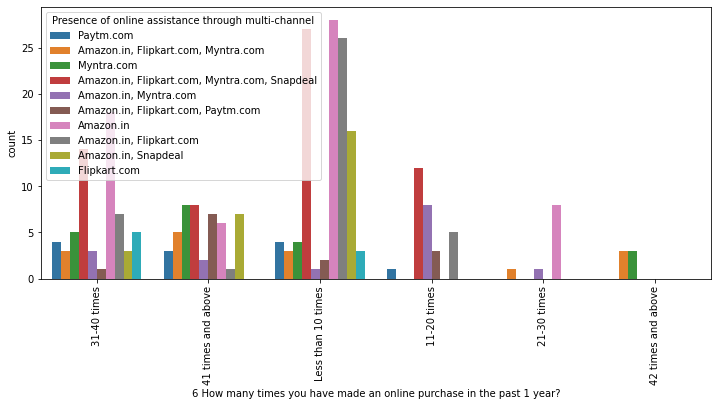

Longer time to get logged in (promotion, sales period) vs  How many times you have made an online purchase in the past 1 year?


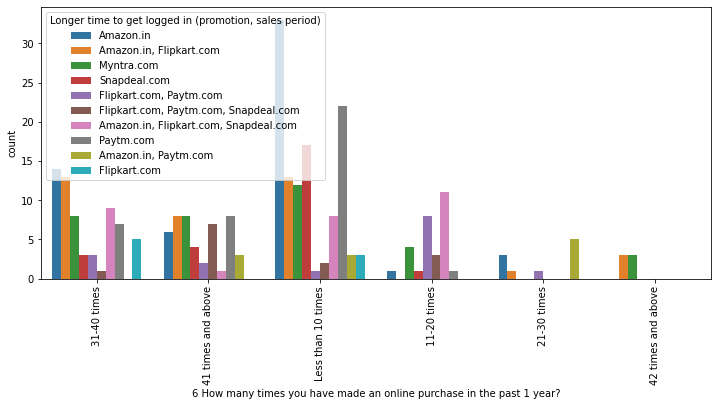

Longer time in displaying graphics and photos (promotion, sales period) vs  How many times you have made an online purchase in the past 1 year?


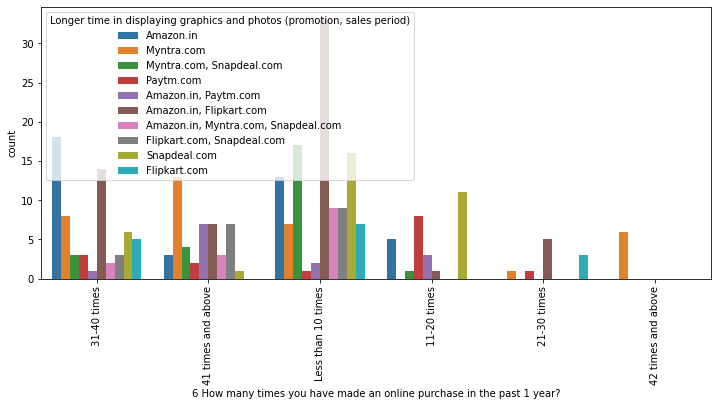

Late declaration of price (promotion, sales period) vs  How many times you have made an online purchase in the past 1 year?


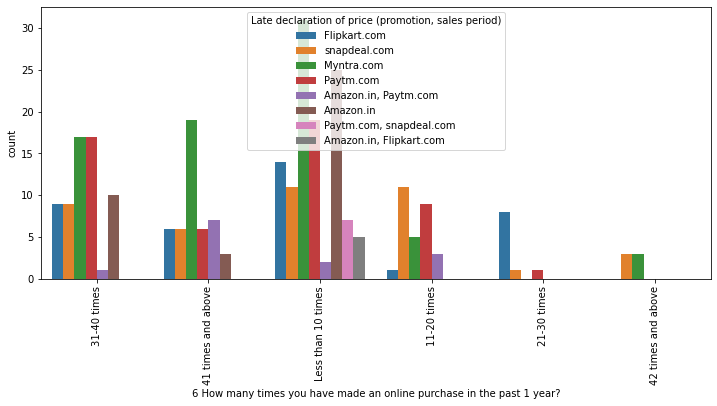

Longer page loading time (promotion, sales period) vs  How many times you have made an online purchase in the past 1 year?


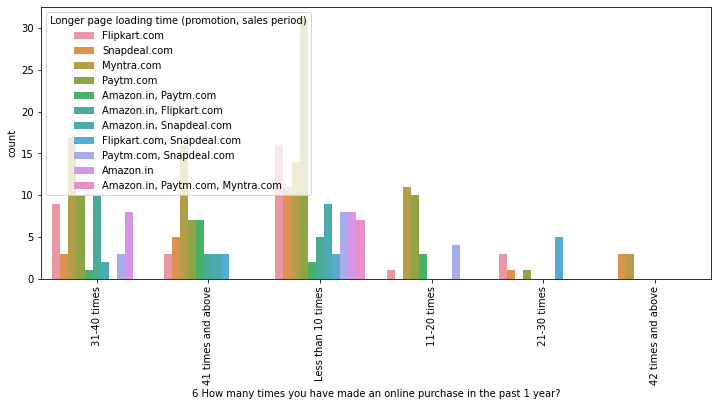

Limited mode of payment on most products (promotion, sales period) vs  How many times you have made an online purchase in the past 1 year?


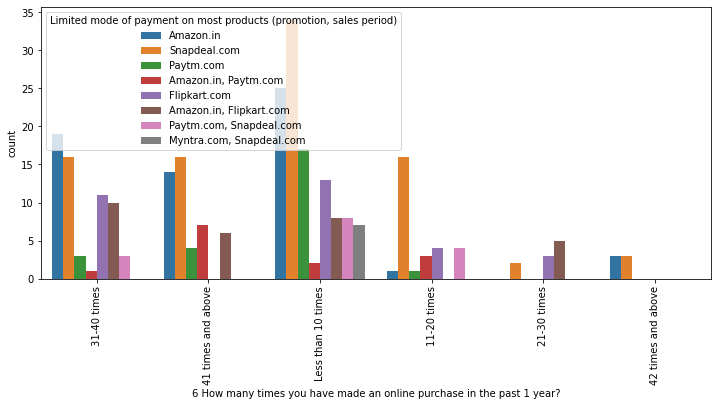

Longer delivery period vs  How many times you have made an online purchase in the past 1 year?


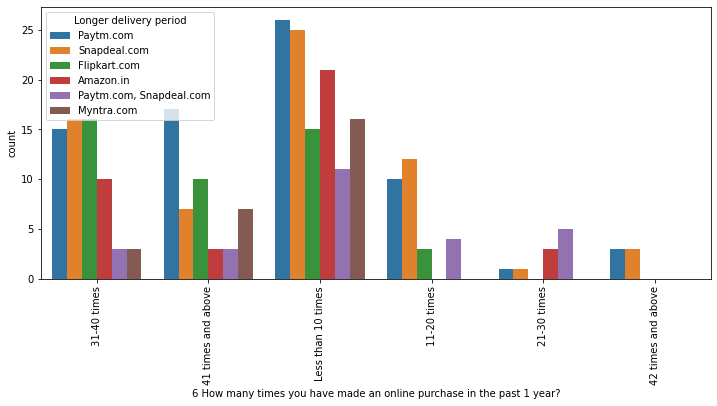

Change in website/Application design vs  How many times you have made an online purchase in the past 1 year?


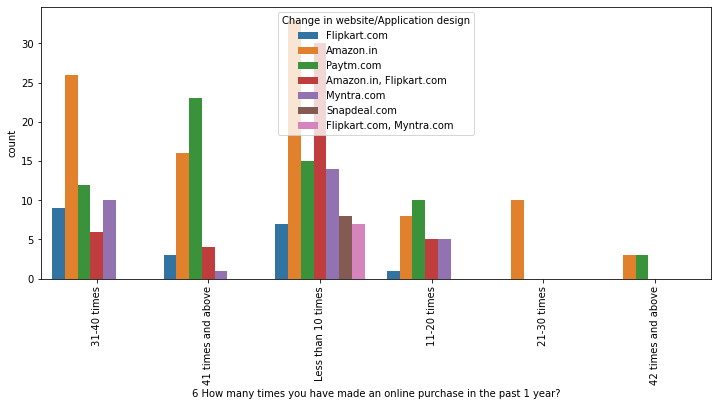

Frequent disruption when moving from one page to another vs  How many times you have made an online purchase in the past 1 year?


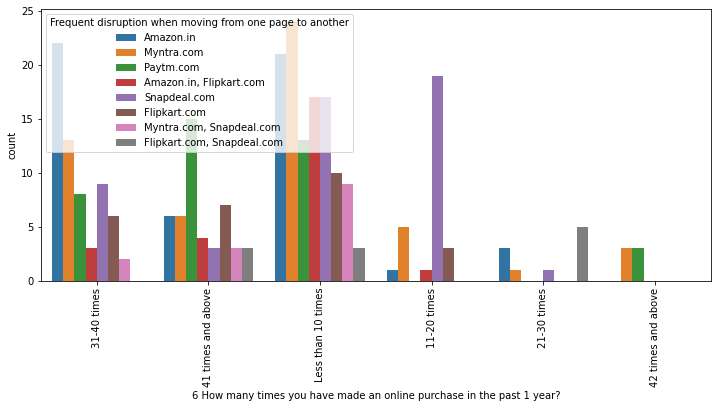

Website is as efficient as before vs  How many times you have made an online purchase in the past 1 year?


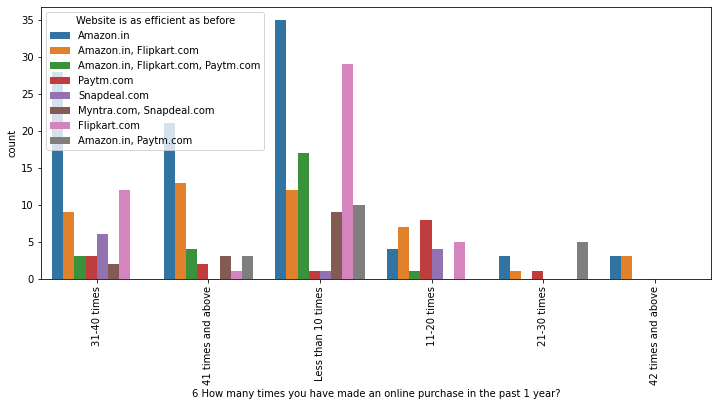

Which of the Indian online retailer would you recommend to a friend? vs  How many times you have made an online purchase in the past 1 year?


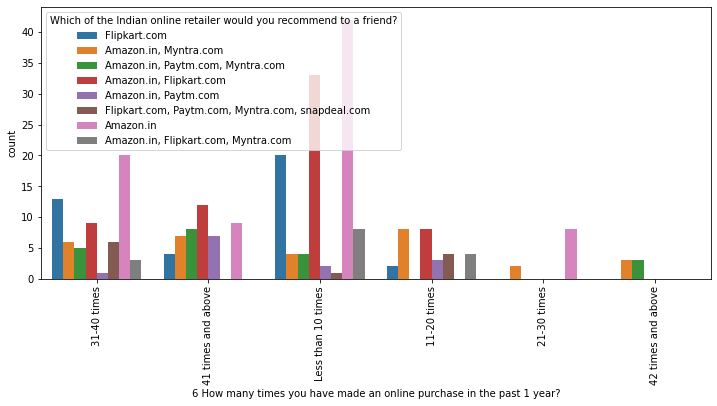

In [69]:
df2=df.iloc[:,[0,1,2,4,5,13,14,16,26,31,32,34,37,38,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70]]
for i in df2:
    print(i,'vs  How many times you have made an online purchase in the past 1 year?')
    plt.subplots(figsize=(12,5))
    sns.countplot(x='6 How many times you have made an online purchase in the past 1 year?',hue=i,data=df2)
    plt.xticks(rotation=90)
    plt.show()
    

Females have shopped more number of times in last 1 year

Most of the individuals that do online shopping are from the age group  21-30 yrs. and, 31-40 yrs.
People below 20 years ,&people over 50 years of age do not do much online shopping  .

Customers from Delhi,Noida & Bangalore region have shopped most number of times


Most customers who are shopping online from 1 to 4 years have shopped less than 10 times and customers shoppping online for above 4 years have highest purchase count in all more than 10 times group


Most customers spends more than 15 minutes before making decision irrespective of the purchase count


Most of the  customers generally  preferred credit/Debit cards for payment followed by cash on delivery.Very few customer opt for E-wallet payment.


Most customers who purchased less than 10 times abandoned the cart due to better alternative offer.cutomers purchasing more than 41 times abandoned due to promo code not applied Or better alternative offer


It can be seen clearly that all customers irrespective of the purchase count strongly agree with the empathy which means empathy is very important for customer satisfaction and hence retention. The reason is insecurity amongst the customers. If they have a provision of a helpline number associated with the website, that sense of insecurity vanishes and the customer can trust the website more. A 24X7 support is a must for these online retail stores.


Maximum  customers agree with online shopping being flexible,irrespective of purchase count as it provides freedom to shop without the influence or pressure from sales staff often encountered in offline stores.


We can clearly see  that return and replacement policy plays an important role in customer satisfaction.


Displaying quality Information on the website improves satisfaction of customers:Most of the customers strongly agreed to this.Shoppers expect online retailers to provide all relevant and accurate information about the product.Providing appropriate information can help online retailers to dispel concerns and fears of consumers towards a particular product or online shopping

User satisfaction cannot exist without trust:We see that,user with lack of trust have shpped less number of time.It means,trust is an area where online shopping still lags as several instances have been reported of customers being duped on receiving products that did not match the description claimed or turned out to be knock-offs.So, it is important for companies to learn how to manage consumers' trust 

Customers who have shopped more than 30 times strongly agree that net benefit from online purchase leads to user satisfaction Hence net benefit derived is an important factor for customer retention



Offering a wide variety of listed product in several category:Customers having purchase frequency of more than 30 times strongly agree to it.It means product variety increases consumers' likelihood of finding a good match with their preferences

Cutomers with high purchase (>30) agree to get monetary savings


Almost all customers with high purchase agree that they get value for money spent.it indicates that quality of product sold plays an important role in customer retention

Highest number of customers have shopped from amazon, paytm and myntra


Highets number of customers like amazon, paymt and myntra web page layout


Highest number of customers like amazon and flipkart in terms of variety of product offered


Highest number of customers like amazon and flipkart in terms of relevant and complete description of products


High proportion of high purchase frequency customers like amazon and paytm in terms od website speed


Highest relaibility is obtianed by amazon and flipkart


Highest number of customers like Amazon in terms of quickness to complete purchase


In terms of payment option Amazon, flipkart and myntra are liked most by the high purchase frequency customers


Amazon stands apart in terms of speed of order delivery and privacy of customers information


Most of customers like amazon in terms of online assistance through multichannel


Most user claims flipkart to take maximumm login time during sales/promotion


Highest customers claims myntra  take maximum time in displaying graphics and photos

### when customers are satisfied with a company or service, there is a high possibility that they will share their experience with other people .Therefore it is crucial for E-commerce to take into account their customer satisfaction because this will retain customer loyalty as well as attract potential customers.